In [1]:
!python -m pip install texlive texlive-latex-extra texlive-fonts-recommended dvipng

ERROR: Could not find a version that satisfies the requirement texlive (from versions: none)
ERROR: No matching distribution found for texlive
You should consider upgrading via the 'c:\Users\lenovo\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [3]:
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
%matplotlib inline

# Useful for running matplotlib on high-dpi displays
%config InlineBackend.figure_format='retina'

In [4]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [5]:
data = pd.read_csv("telecom_churn.csv")

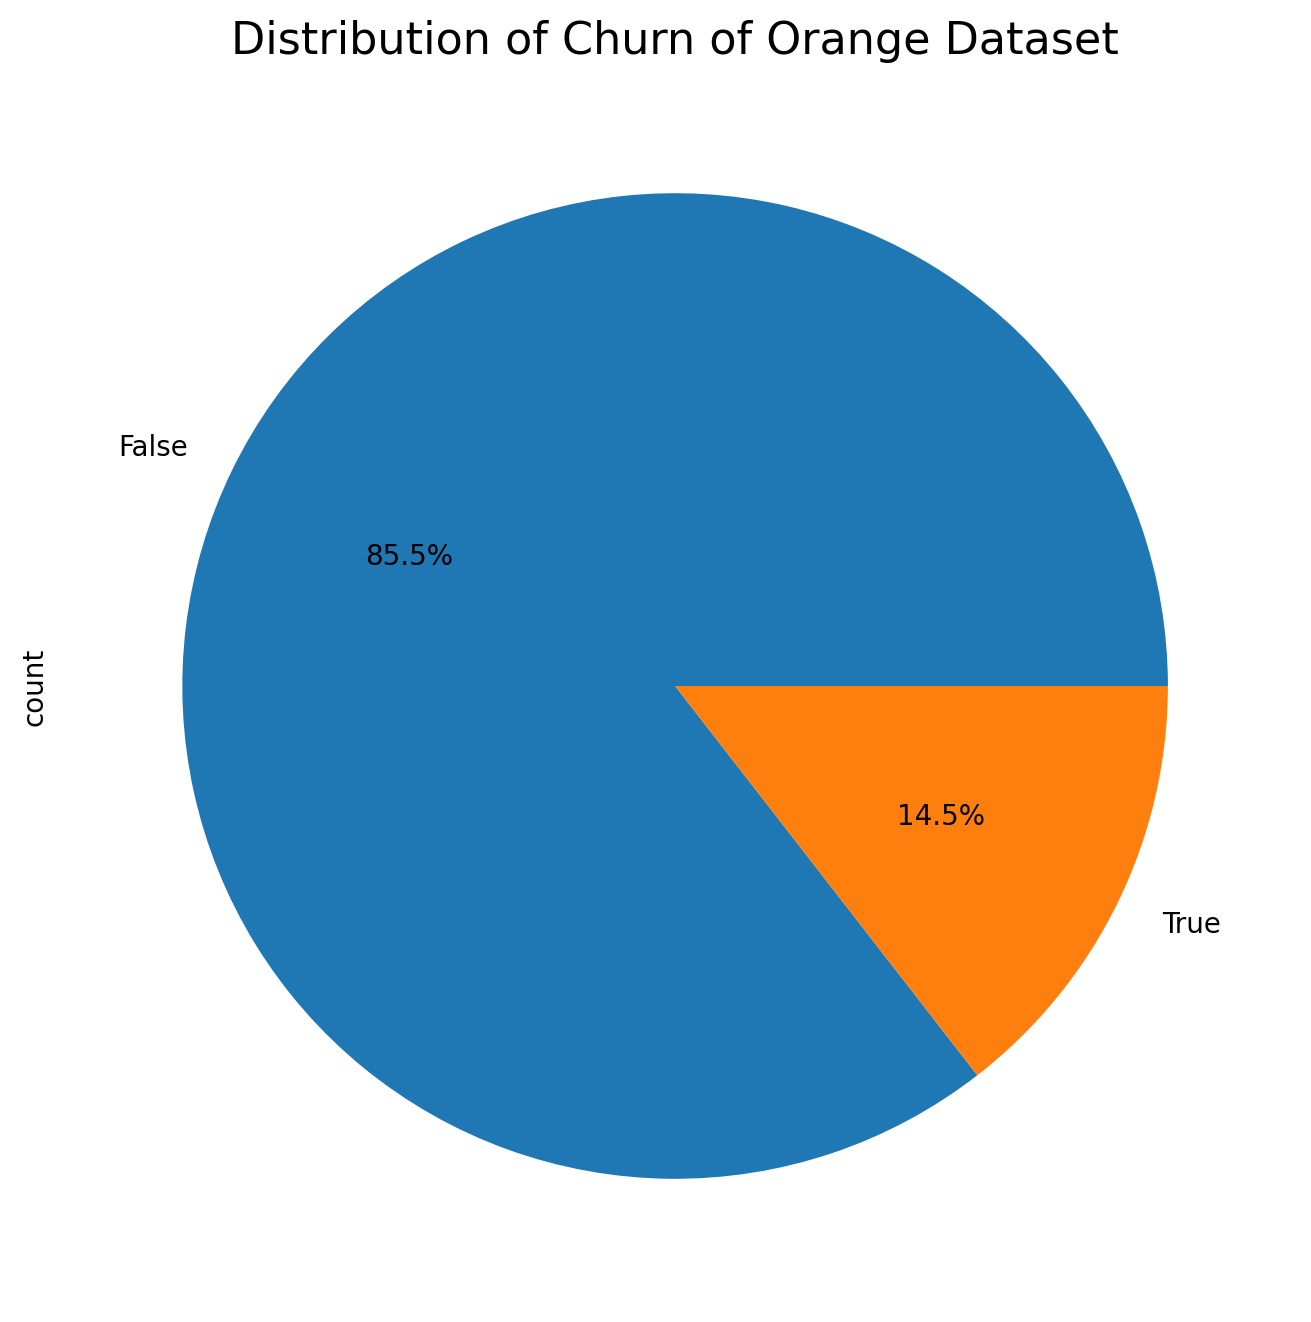

In [6]:
plt.figure(figsize=(10, 8))
data['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Churn of Orange Dataset', fontsize=16)
plt.show()


In [7]:
# Display the first few rows and general info about the dataset
data_info = data.info()
data_head = data.head()
data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

(None,
   State  Account length  Area code International plan Voice mail plan  \
 0    KS             128        415                 No             Yes   
 1    OH             107        415                 No             Yes   
 2    NJ             137        415                 No              No   
 3    OH              84        408                Yes              No   
 4    OK              75        415                Yes              No   
 
    Number vmail messages  Total day minutes  Total day calls  \
 0                     25              265.1              110   
 1                     26              161.6              123   
 2                      0              243.4              114   
 3                      0              299.4               71   
 4                      0              166.7              113   
 
    Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
 0             45.07              197.4               99             16.78   

## Change data format

In [8]:
# Original:
data.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [9]:
# Convert the "Area code" column to a categorical type
data['Area code'] = data['Area code'].astype('object')

# Verify the conversion by checking the data types again
data.dtypes

State                      object
Account length              int64
Area code                  object
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

## Numerical summary

In [24]:
# Summary statistics for numerical columns in the DataFrame
numerical_summary = data.describe().round(2)

# Display the summary statistics
numerical_summary

Account length  Number vmail messages  Total day minutes  \
count         3333.00                3333.00            3333.00   
mean           101.06                   8.10             179.78   
std             39.82                  13.69              54.47   
min              1.00                   0.00               0.00   
25%             74.00                   0.00             143.70   
50%            101.00                   0.00             179.40   
75%            127.00                  20.00             216.40   
max            243.00                  51.00             350.80   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count          3333.00           3333.00            3333.00          3333.00   
mean            100.44             30.56             200.98           100.11   
std              20.07              9.26              50.71            19.92   
min               0.00              0.00               0.00             0.00   
25%              87.00             24.43             166.60            87.00   
50%             101.00             30.50             201.40           100.00   
75%             114.00             36.79             235.30           114.00   
max             165.00             59.64             363.70           170.00   

       Total eve charge  Total night minutes  Total night calls  \
count           3333.00              3333.00            3333.00   
mean              17.08               200.87             100.11   
std                4.31                50.57              19.57   
min                0.00                23.20              33.00   
25%               14.16               167.00              87.00   
50%               17.12               201.20             100.00   
75%               20.00               235.30             113.00   
max               30.91               395.00             175.00   

       Total night charge  Total intl minutes  Total intl calls  \
count             3333.00             3333.00           3333.00   
mean                 9.04               10.24              4.48   
std                  2.28                2.79              2.46   
min                  1.04                0.00              0.00   
25%                  7.52                8.50              3.00   
50%                  9.05               10.30              4.00   
75%                 10.59               12.10              6.00   
max                 17.77               20.00             20.00   

       Total intl charge  Customer service calls  
count            3333.00                 3333.00  
mean                2.76                    1.56  
std                 0.75                    1.32  
min                 0.00                    0.00  
25%                 2.30                    1.00  
50%                 2.78                    1.00  
75%                 3.27                    2.00  
max                 5.40                    9.00

## Analyze distribution of Churn

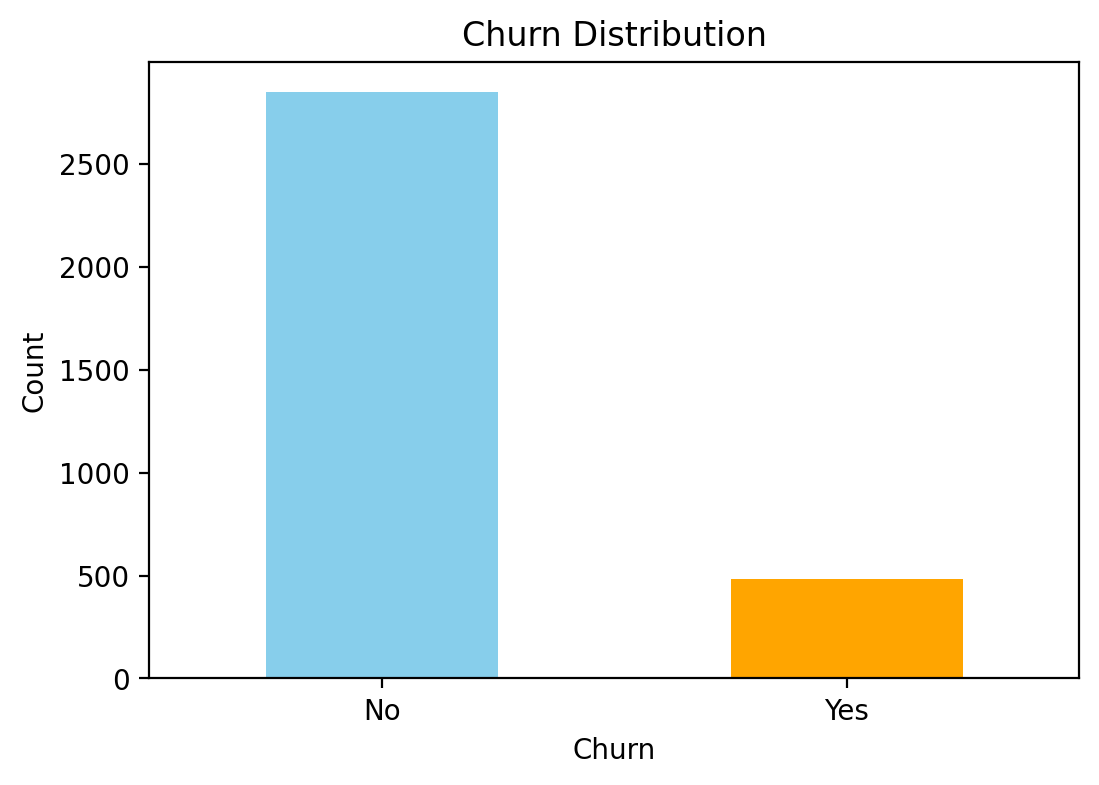

In [10]:
import matplotlib.pyplot as plt

# Churn distribution
churn_counts = data['Churn'].value_counts()

# Plot churn distribution
plt.figure(figsize=(6,4))
churn_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()


In [11]:
# Calculate churn rate
churn_rate = data['Churn'].mean() * 100  # Percentage

churn_rate


14.491449144914492

The churn rate in the dataset is approximately 14.49%. This means that around 14.5% of the customers in the dataset have discontinued their service with the company, while the remaining 85.5% have stayed. This relatively low churn rate indicates that most customers are retained, but a significant portion is still leaving. A churn rate of this magnitude may warrant a closer examination of the factors influencing customer attrition, as even a small churn rate can have substantial financial implications, especially for subscription-based businesses. Reducing churn by even a few percentage points can lead to significant improvements in revenue retention and customer lifetime value.

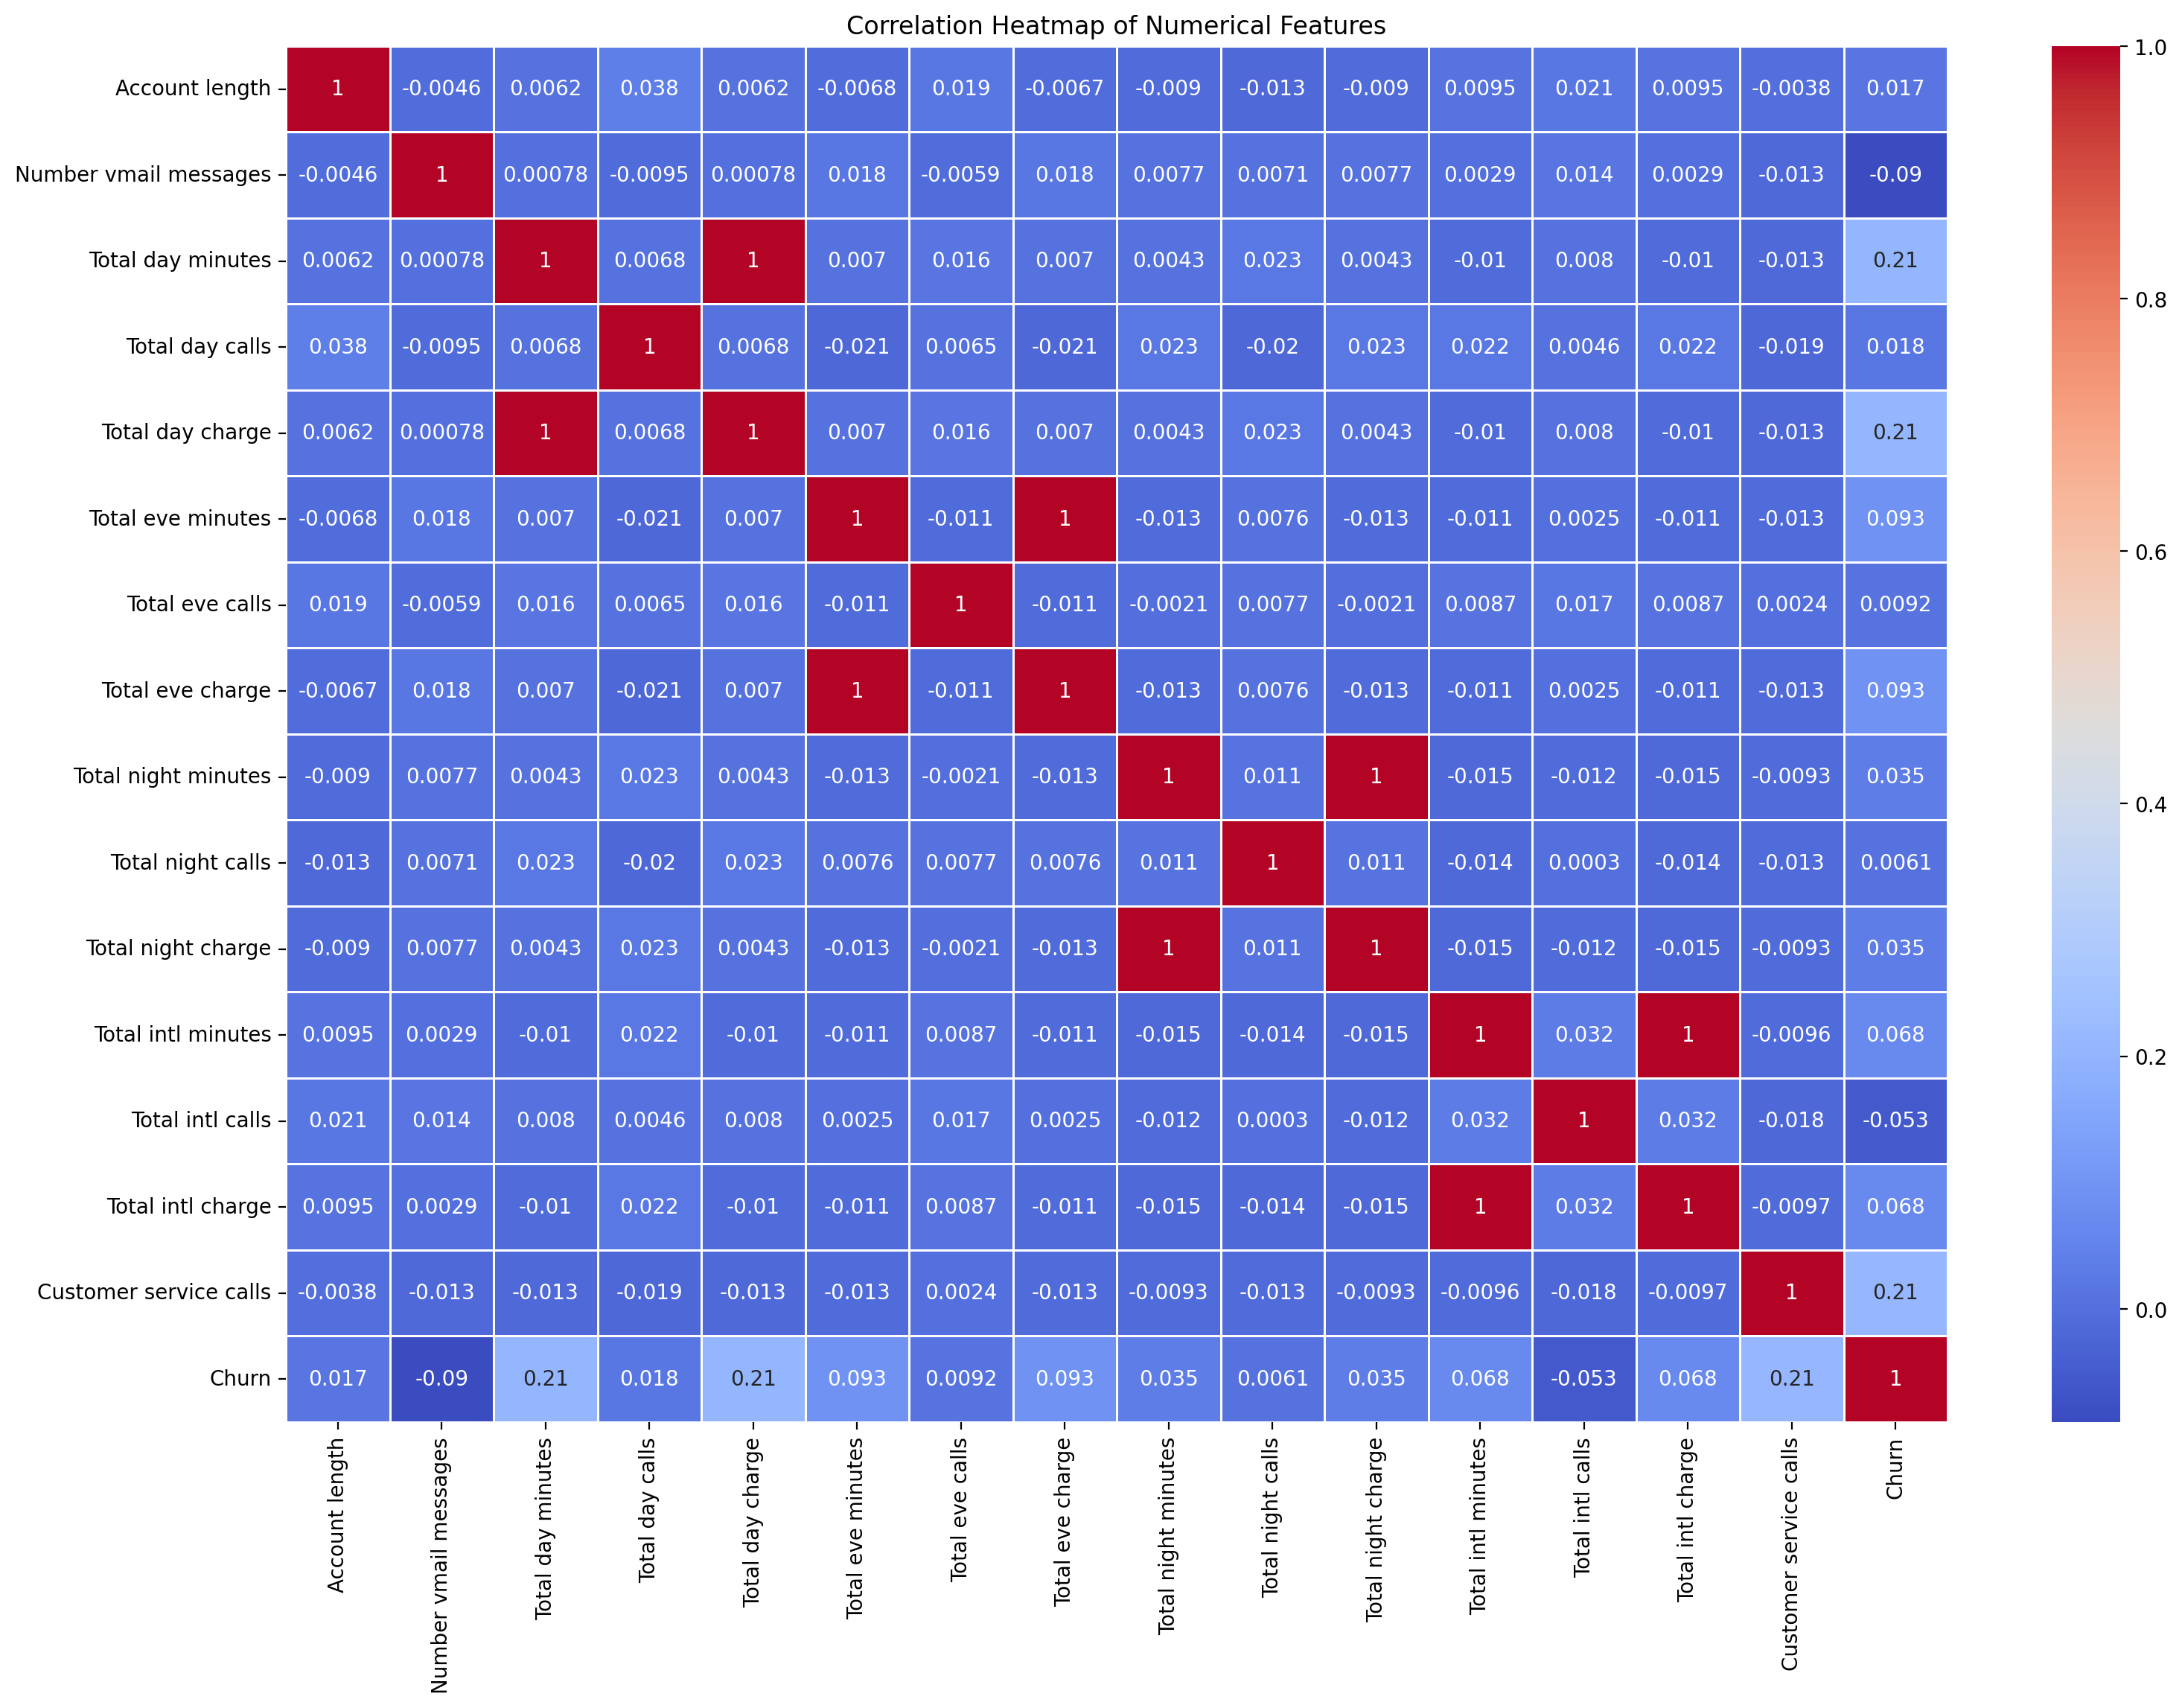

In [12]:
import seaborn as sns
# Selecting only numeric columns for correlation matrix
numeric_columns = data.select_dtypes(include=['float64', 'int64', 'bool'])

# Correlation matrix for numeric columns only
corr_matrix = numeric_columns.corr()

# Plot heatmap
# Plot heatmap with larger dimensions
plt.figure(figsize=(18,12))  # Increase the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


Charges and minutes are tightly linked, as expected, because charges are derived directly from the minutes used in various time periods (day, evening, night, and international). Therefore, these variables do not provide additional predictive information about churn beyond one another. The most notable correlation related to churn is the number of customer service calls, with a moderate positive correlation of approximately 0.21, indicating that customers who make more service calls are more likely to churn. This suggests that frequent interactions with customer service, possibly due to dissatisfaction or issues, may lead to churn. Conversely, usage patterns, including the total number of minutes spent on calls during different times of the day, show little to no correlation with churn, meaning that the amount of service usage is not a strong predictor of whether a customer will leave. Additionally, account length shows a weak negative correlation with churn, implying that customers with longer relationships with the company are slightly less likely to churn, but this effect is minimal. Overall, customer dissatisfaction, reflected through service call frequency, may be a more significant driver of churn than usage behavior.

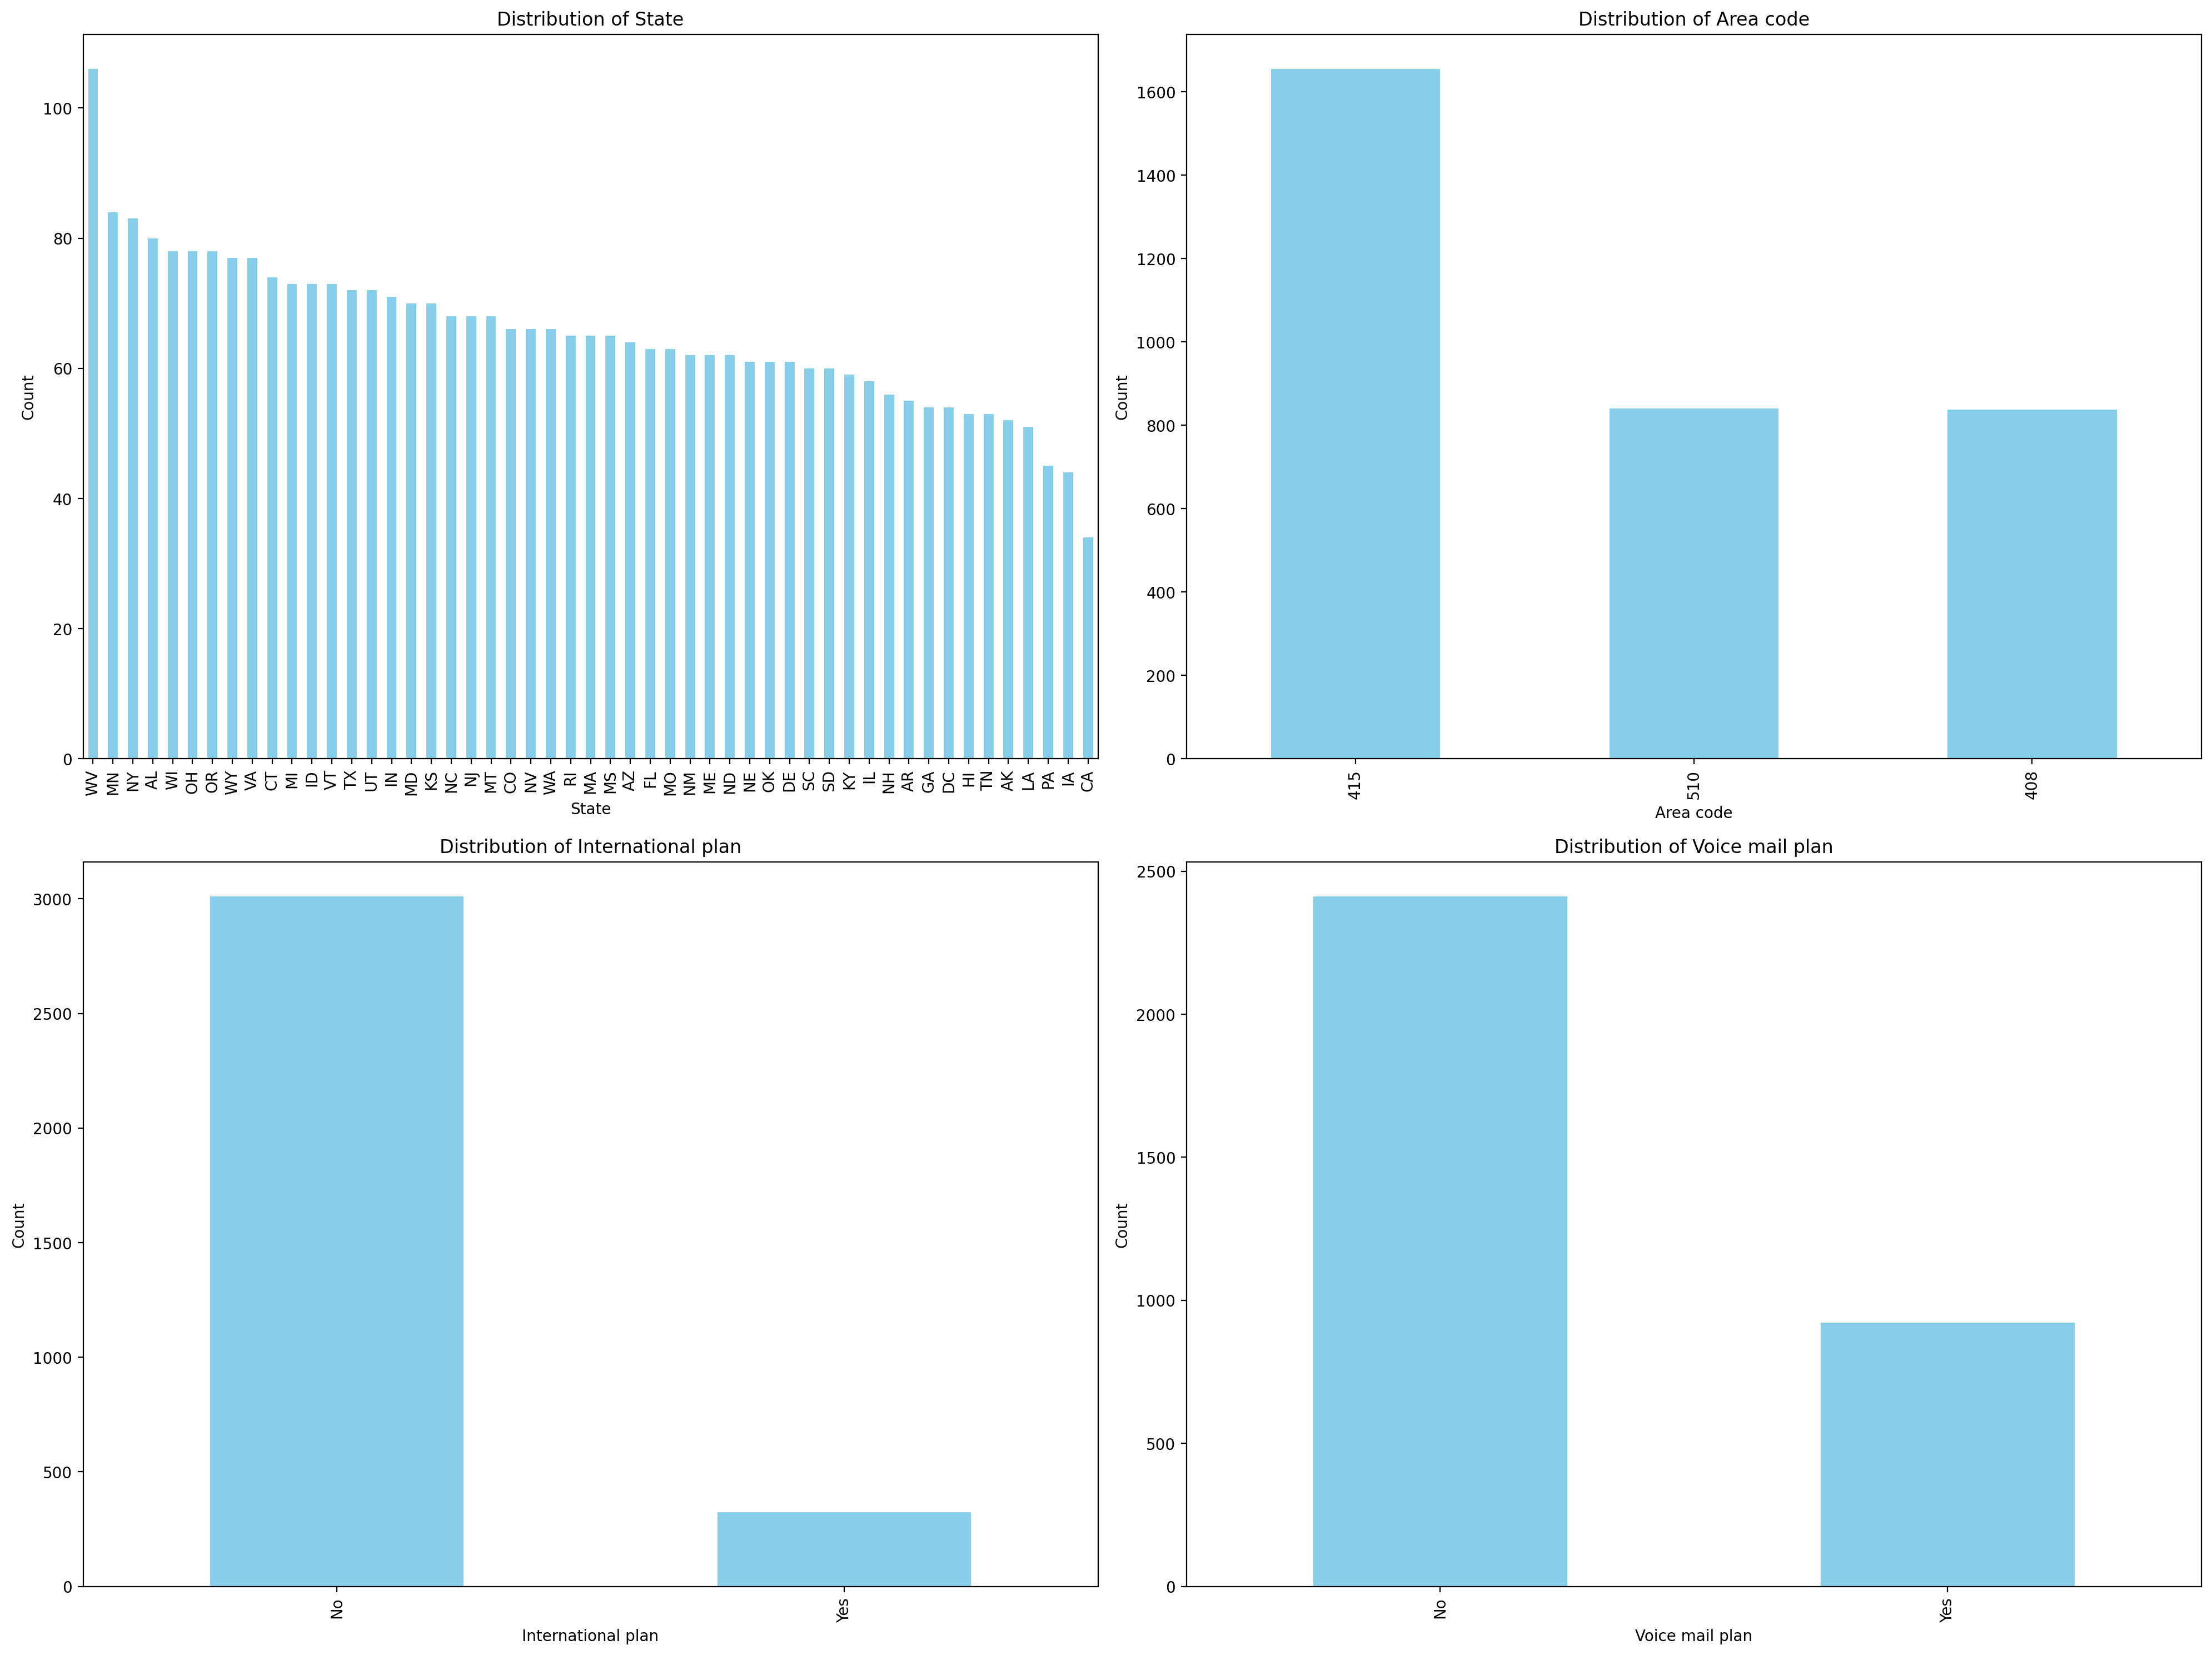

In [13]:
# Distribution of categorical columns
# Plot distribution of categorical columns
categorical_columns = ['State', 'Area code', 'International plan', 'Voice mail plan']
plt.figure(figsize=(20,15))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


The categorical columns exhibit varying degrees of imbalance. Features like the International plan and Voice mail plan show a strong preference for the "No" option, indicating that most customers do not opt for these services. The churn distribution is also imbalanced, with most customers remaining loyal, but the presence of churned customers highlights areas that need further analysis. The even distribution across State and Area code suggests that the customer base is geographically diverse with no clear regional concentration.

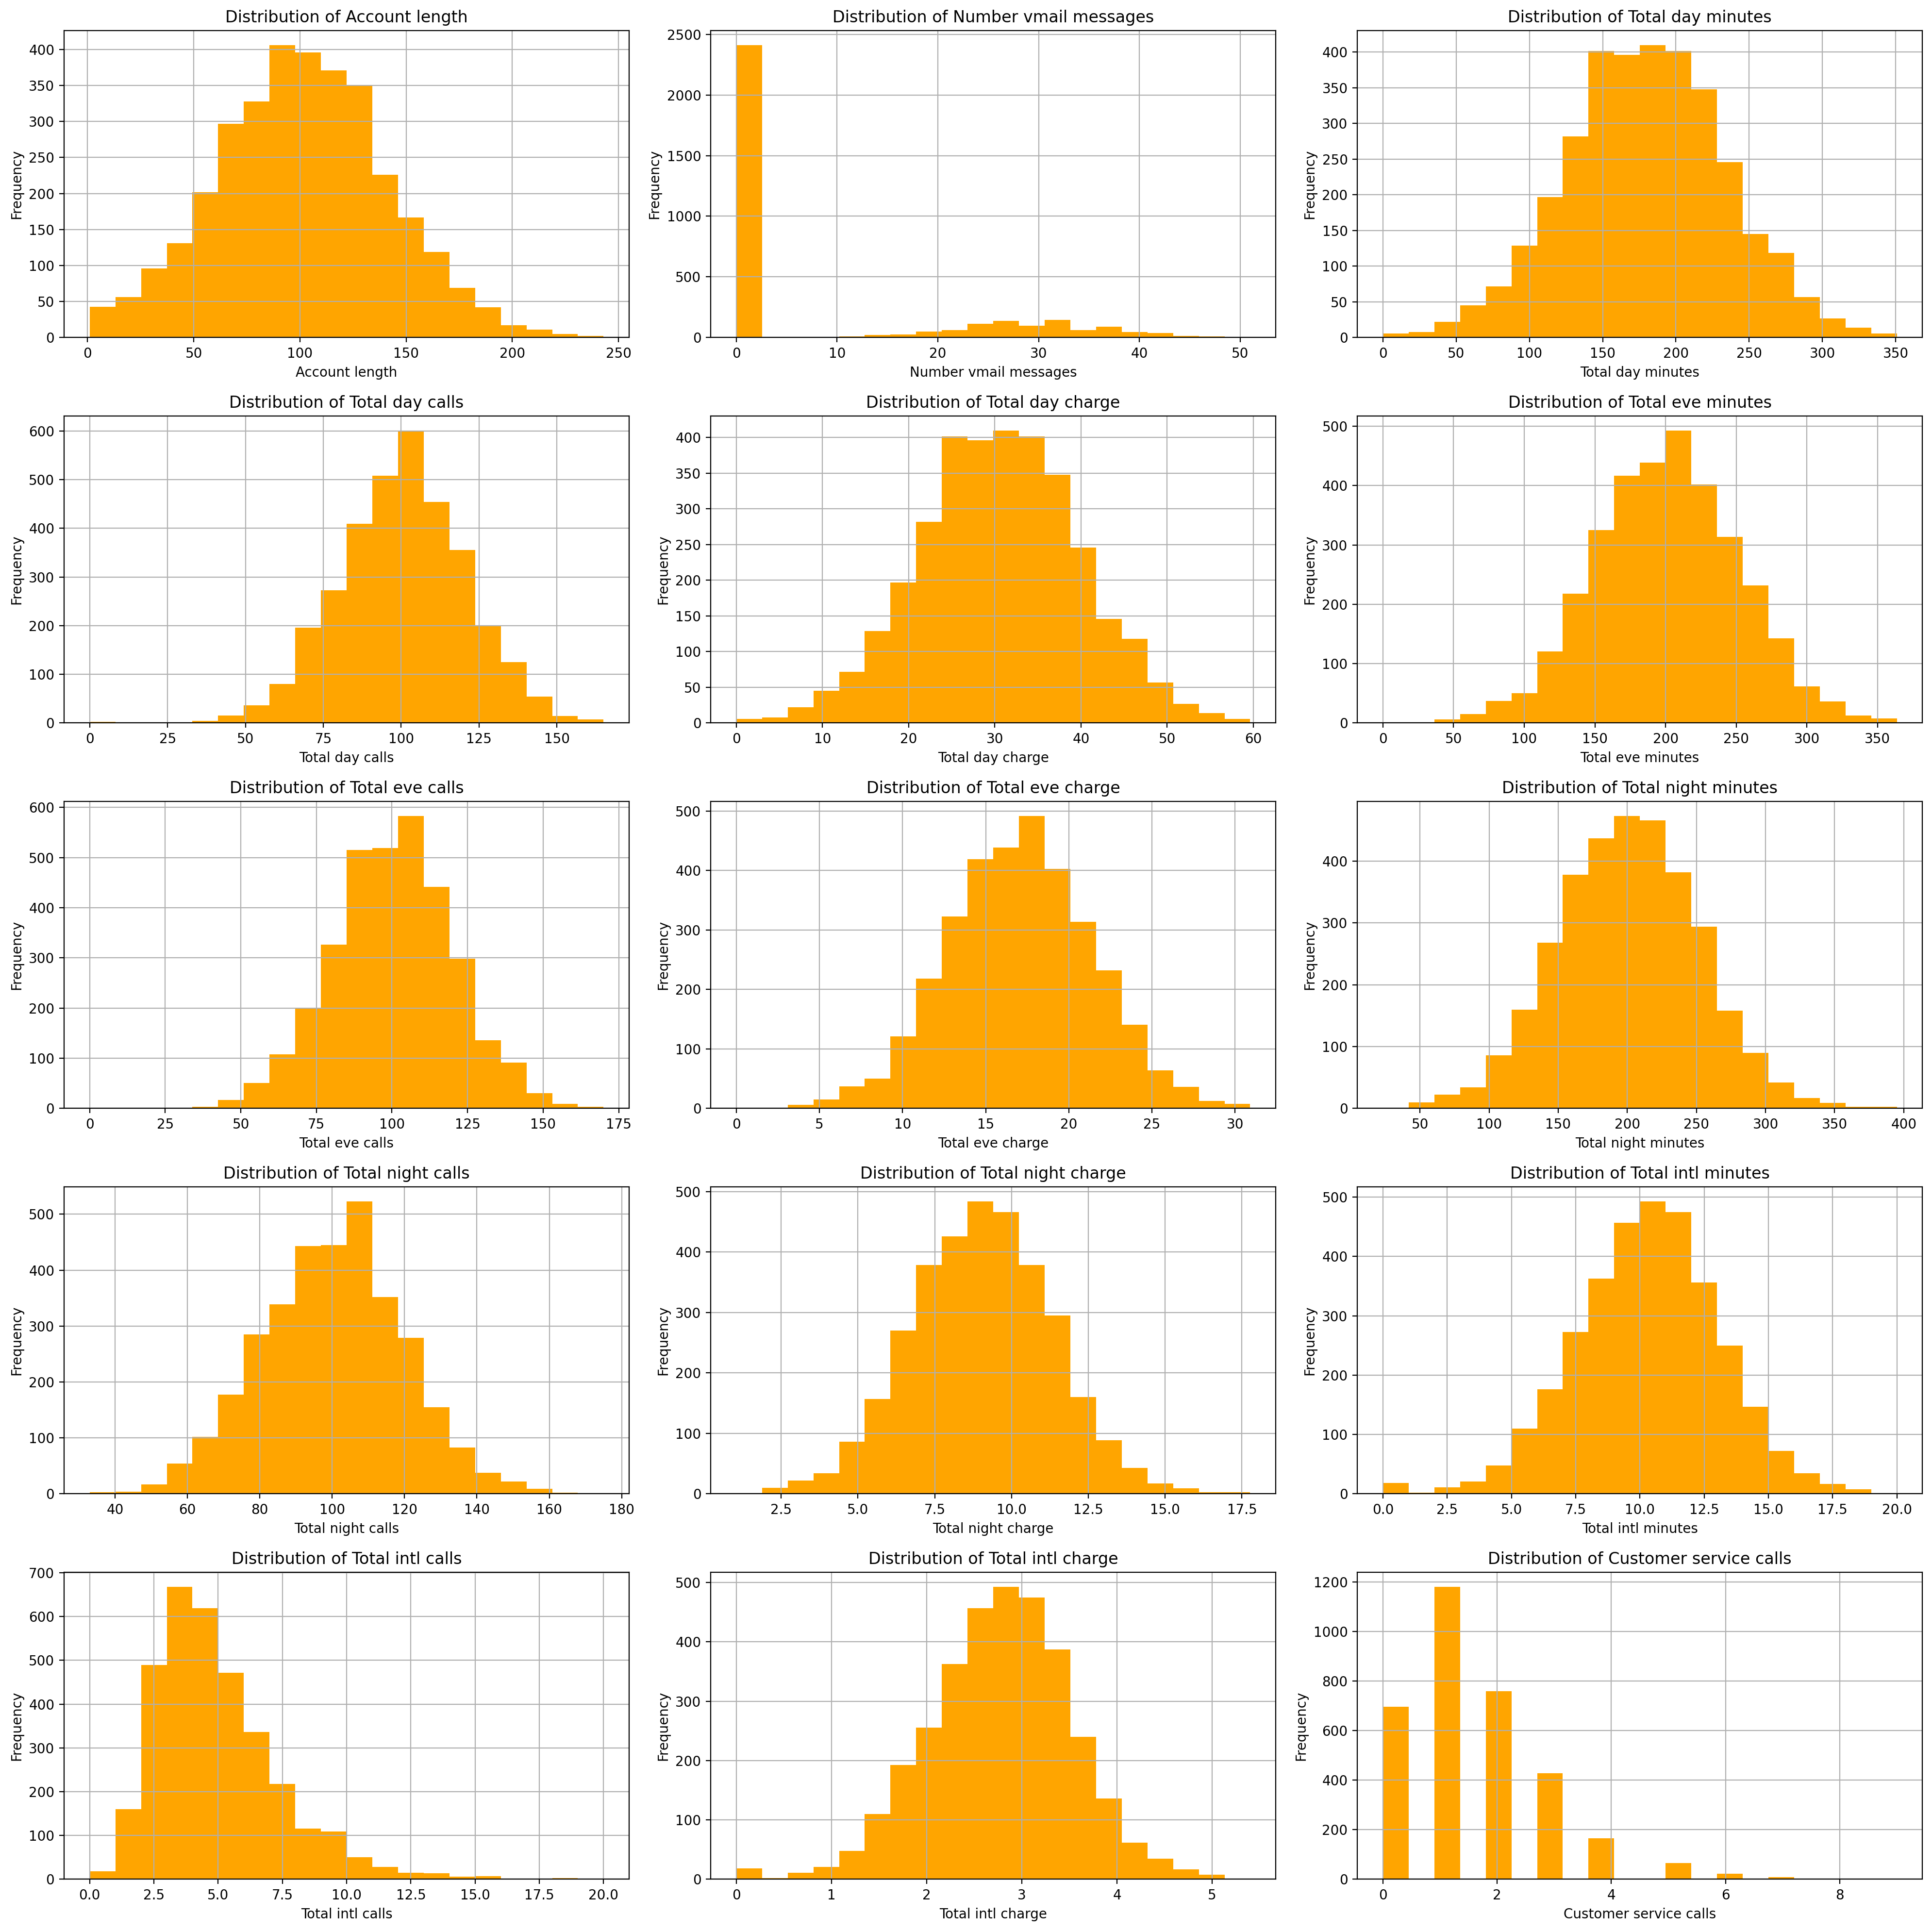

In [14]:
# Plot distribution of numerical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
plt.figure(figsize=(20,20))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)
    data[col].hist(bins=20, color='orange')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


\begin{itemize}
    \item \textbf{Account Length}: The distribution of account length is fairly spread out, with a slight skew towards shorter account lengths. This suggests that most customers have been with the company for a moderate period, with fewer customers having very long-standing accounts.
    
    \item \textbf{Number of Voicemail Messages}: The majority of customers have zero voicemail messages, as seen by a significant spike at zero. This aligns with the observation that most customers do not subscribe to a voicemail plan. Very few customers have a high number of voicemail messages.
    
    \item \textbf{Total Day Minutes, Total Eve Minutes, Total Night Minutes, Total International Minutes}: These columns show a roughly normal distribution (bell-shaped), with most customers using a moderate amount of minutes. A few outliers represent customers with very high usage.
    
    \item \textbf{Total Day Calls, Total Eve Calls, Total Night Calls, Total International Calls}: The number of calls is distributed quite uniformly across these columns. Most customers make a moderate number of calls, with fewer customers making very high or very low numbers of calls.
    
    \item \textbf{Total Day Charge, Total Eve Charge, Total Night Charge, Total International Charge}: The distributions for these charges mirror the distributions for the corresponding minutes (day, evening, night, and international) because charges are directly derived from the number of minutes used. These are also close to normal, with a few outliers representing higher charges.
    
    \item \textbf{Customer Service Calls}: The distribution of customer service calls is heavily skewed towards zero, meaning most customers rarely contact customer service. A small portion of customers, however, have made multiple service calls, which may suggest dissatisfaction and a higher risk of churn.
\end{itemize}

\subsection*{Summary}
Most of the numerical columns (such as minutes, calls, and charges) follow a normal distribution, with most customers using a moderate amount of services. A few outliers, representing high usage or high charges, may either be high-value customers or those at risk of churn. Voicemail messages and customer service calls are highly skewed, with most customers not using voicemail and few calling customer service frequently. The distribution of customer service calls could indicate potential dissatisfaction among those who call frequently.



State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


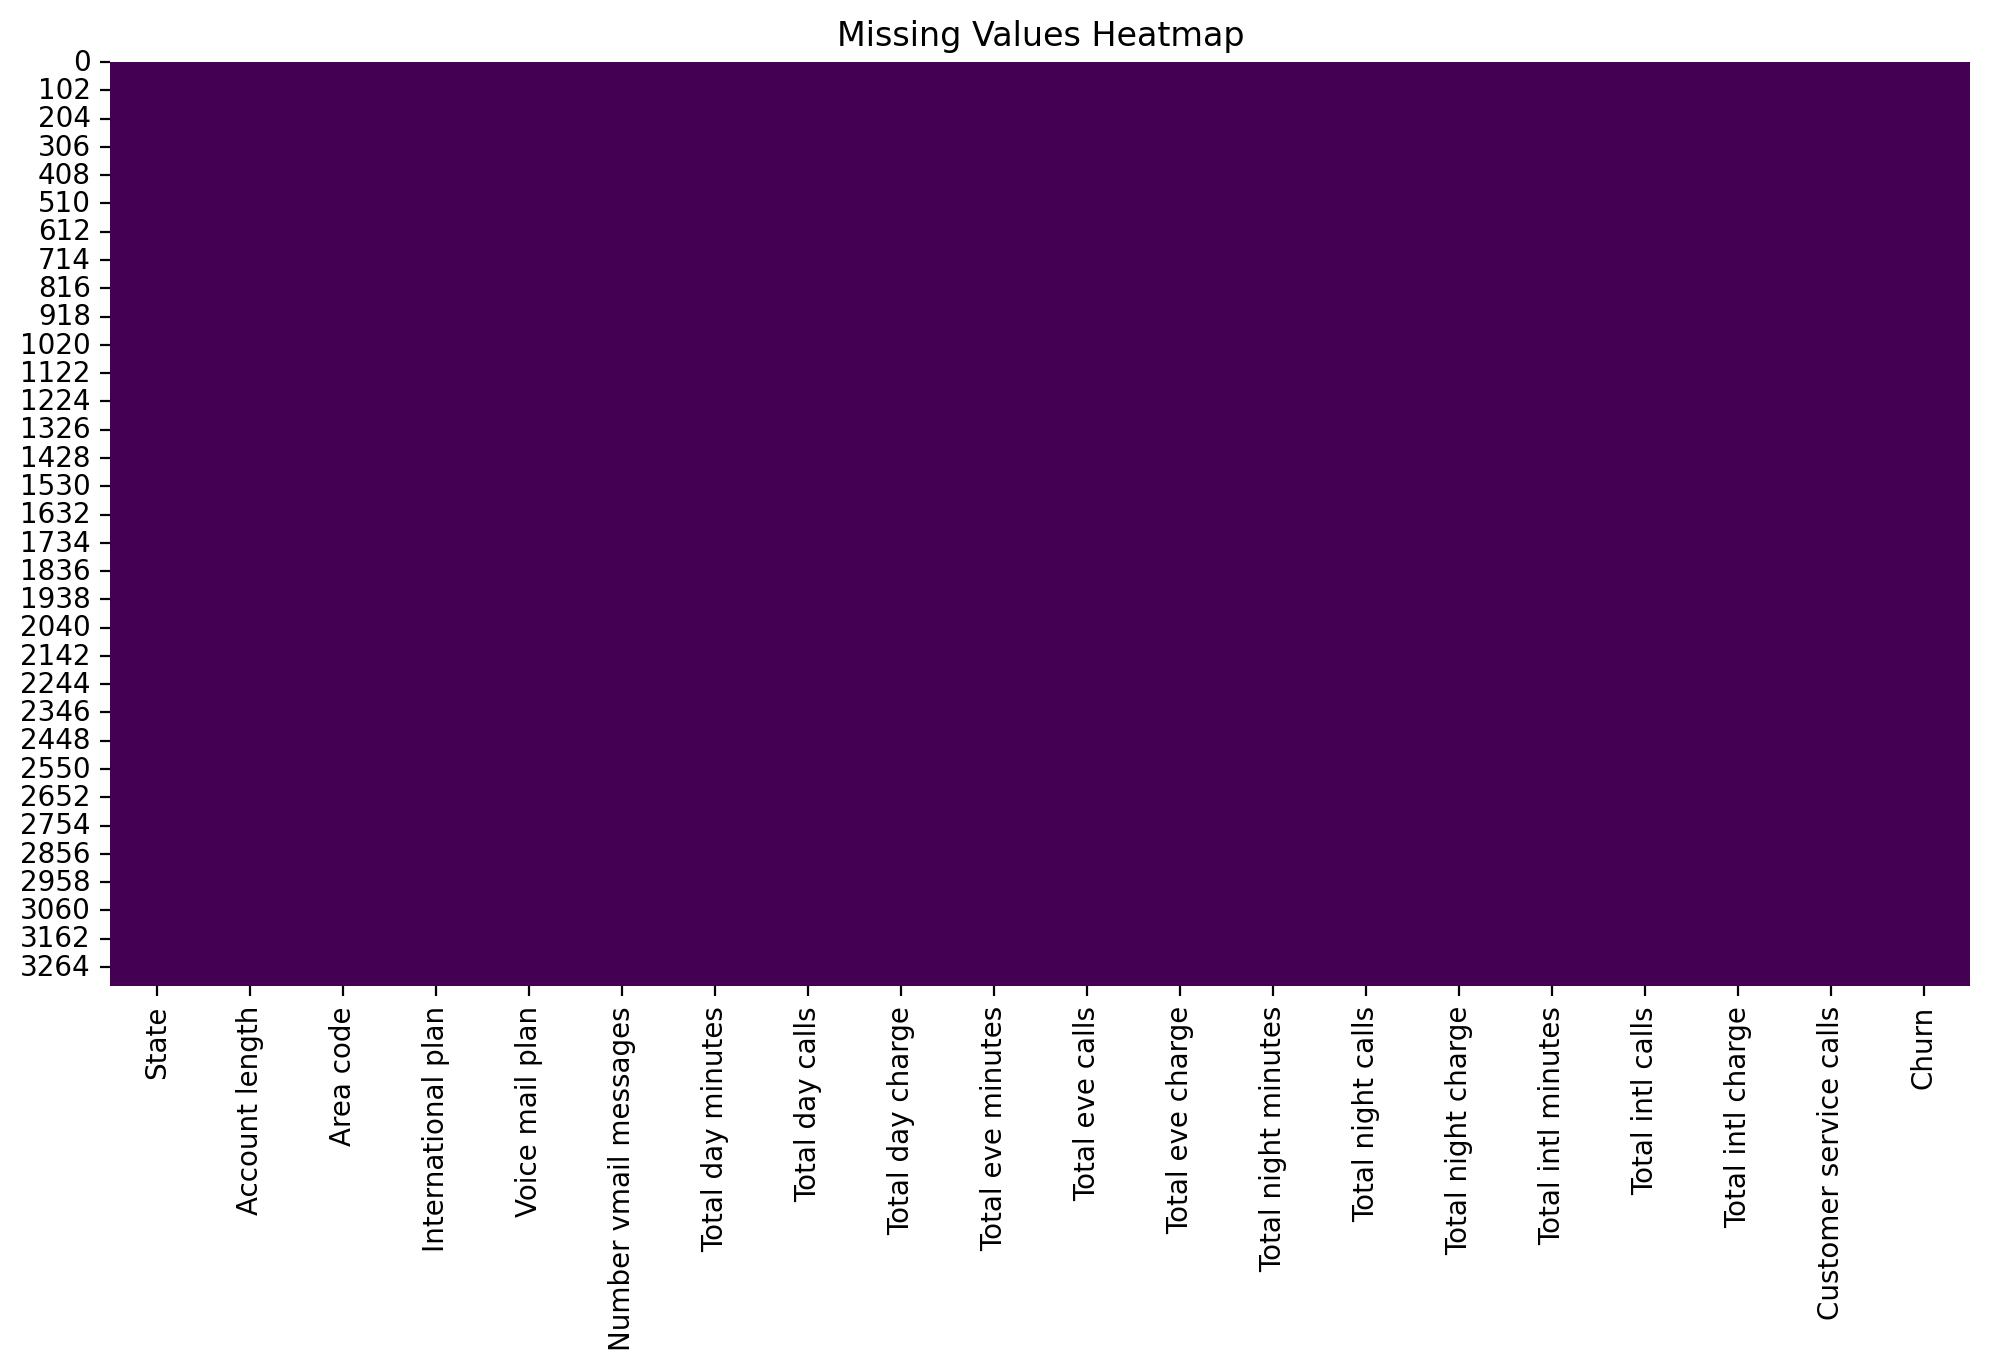

In [15]:
# Visualize missing values
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)
# Display columns with missing values
missing_values[missing_values > 0]

import seaborn as sns
import matplotlib.pyplot as plt

# Plot missing value heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

The heatmap indicates that there are no missing values in the dataset, as the entire grid is fully colored (showing no gaps). Additionally, the summary shows that there are no columns with missing values.

In [16]:
# Detect outlier

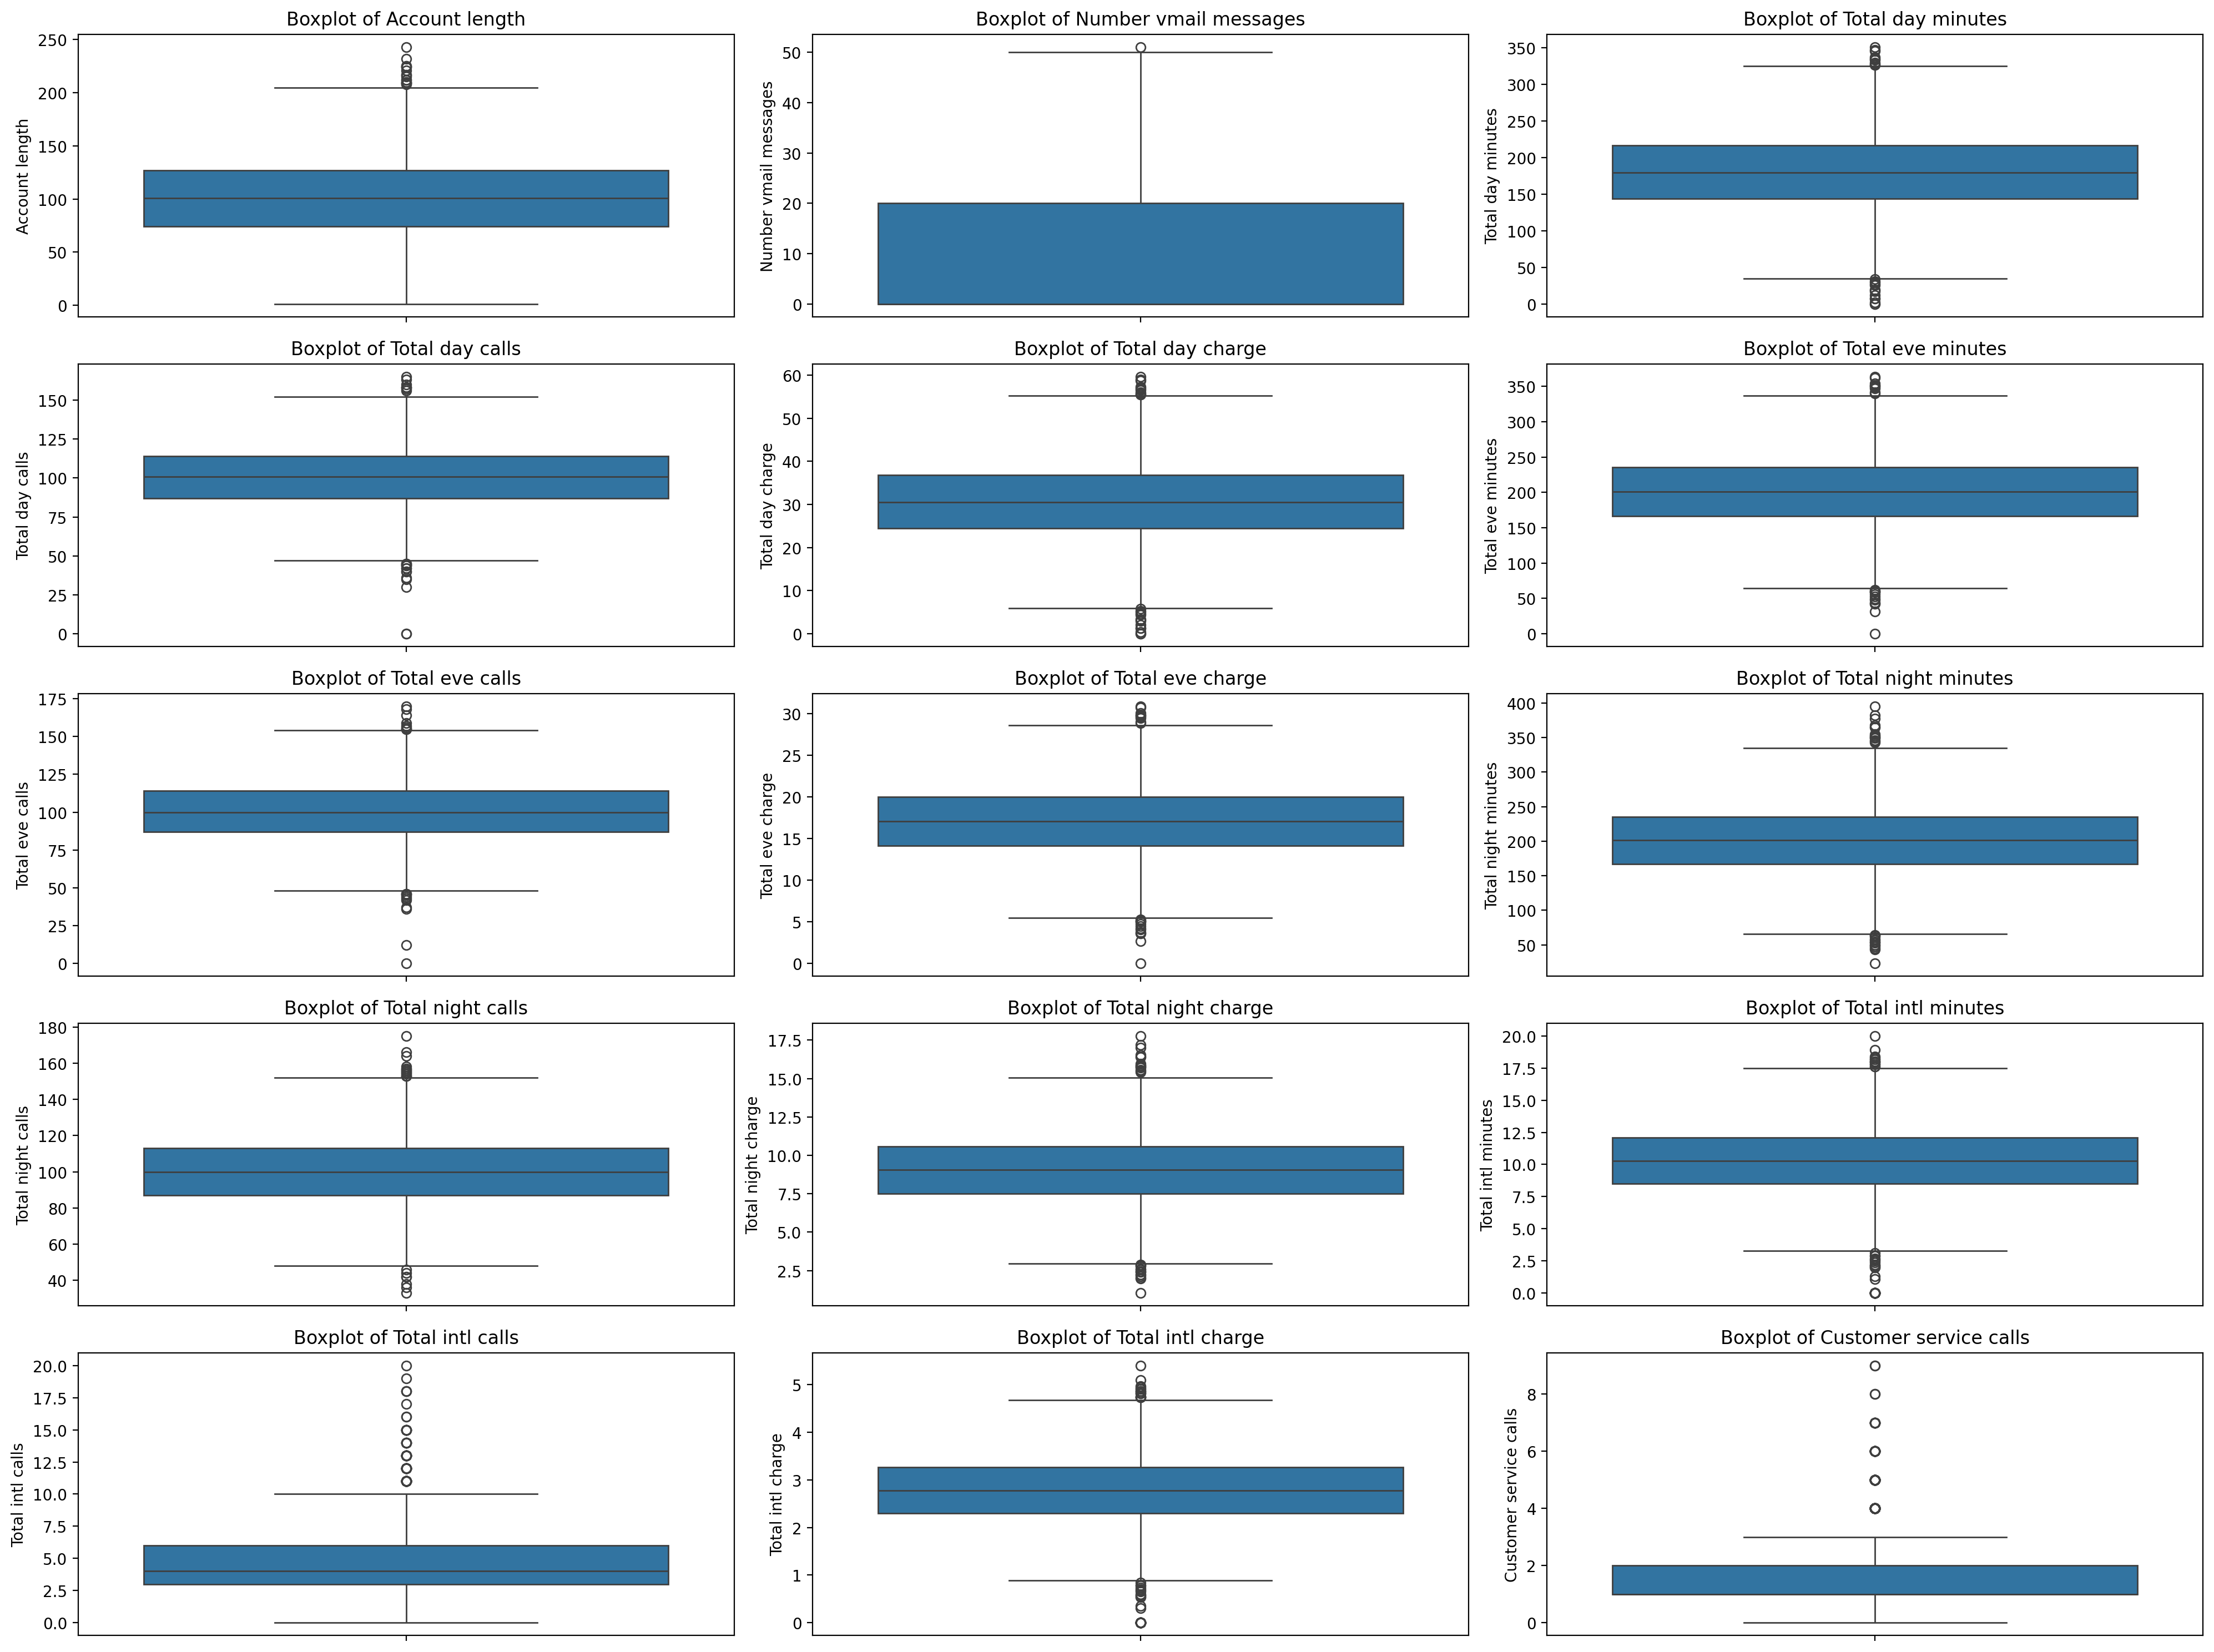

In [17]:
# Plot box plots to visualize outliers in numerical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
plt.figure(figsize=(20,15))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    
plt.tight_layout()
plt.show()


The box plots for the numerical columns reveal several insights about outliers in the dataset:

    For columns such as Total day minutes, Total eve minutes, Total night minutes, and their corresponding charges, there are a few noticeable outliers beyond the whiskers. These likely represent customers with unusually high usage or charges.
    In the Customer service calls column, there are a few clear outliers, where most customers made between 0 to 3 service calls, but some made many more.
    Number of voicemail messages also has outliers with very few customers having a high number of voicemail messages, while most have none.

In [18]:
# Finding outlier by Z-Score
from scipy import stats

# Calculate Z-scores for numerical columns
z_scores = np.abs(stats.zscore(data[numeric_columns]))

# Define a threshold to identify outliers (commonly 3 standard deviations)
outliers = np.where(z_scores > 3)

# Print out the indices of rows containing outliers
outlier_indices = np.unique(outliers[0])
outlier_indices


array([  22,   32,   41,   58,  115,  179,  182,  185,  219,  244,  272,
        301,  314,  329,  332,  343,  365,  377,  416,  468,  474,  483,
        488,  493,  504,  514,  522,  533,  542,  595,  636,  642,  646,
        674,  692,  694,  712,  721,  740,  756,  762,  778,  817,  821,
        837,  845,  854,  863,  878,  883,  889,  902,  908,  921,  922,
        957,  960,  974,  982,  985, 1021, 1028, 1052, 1080, 1092, 1113,
       1121, 1142, 1144, 1179, 1233, 1260, 1273, 1317, 1325, 1333, 1345,
       1355, 1392, 1397, 1400, 1407, 1408, 1419, 1445, 1502, 1551, 1564,
       1567, 1615, 1638, 1694, 1751, 1831, 1865, 1886, 1889, 1912, 1919,
       1986, 1989, 2001, 2212, 2223, 2269, 2288, 2321, 2327, 2331, 2345,
       2362, 2380, 2387, 2428, 2513, 2551, 2553, 2594, 2621, 2659, 2663,
       2669, 2703, 2716, 2732, 2733, 2736, 2753, 2775, 2786, 2835, 2887,
       2903, 2906, 2918, 2930, 2932, 2947, 2953, 2956, 2958, 2961, 2970,
       2979, 2988, 3025, 3026, 3071, 3081, 3107, 31

In [19]:
qwdddwq

NameError: name 'qwdddwq' is not defined

In [13]:
# Checking for duplicates in the dataset
duplicate_rows = data.duplicated()

# Display the number of duplicate rows
num_duplicates = duplicate_rows.sum()
num_duplicates


0

In [26]:
# Check the churn status for outlier rows
outliers_churn_data = data.iloc[outlier_indices][['Churn']]

# Calculate the percentage of outliers who churned
outlier_churn_rate = outliers_churn_data['Churn'].mean() * 100
outlier_churn_rate

25.0

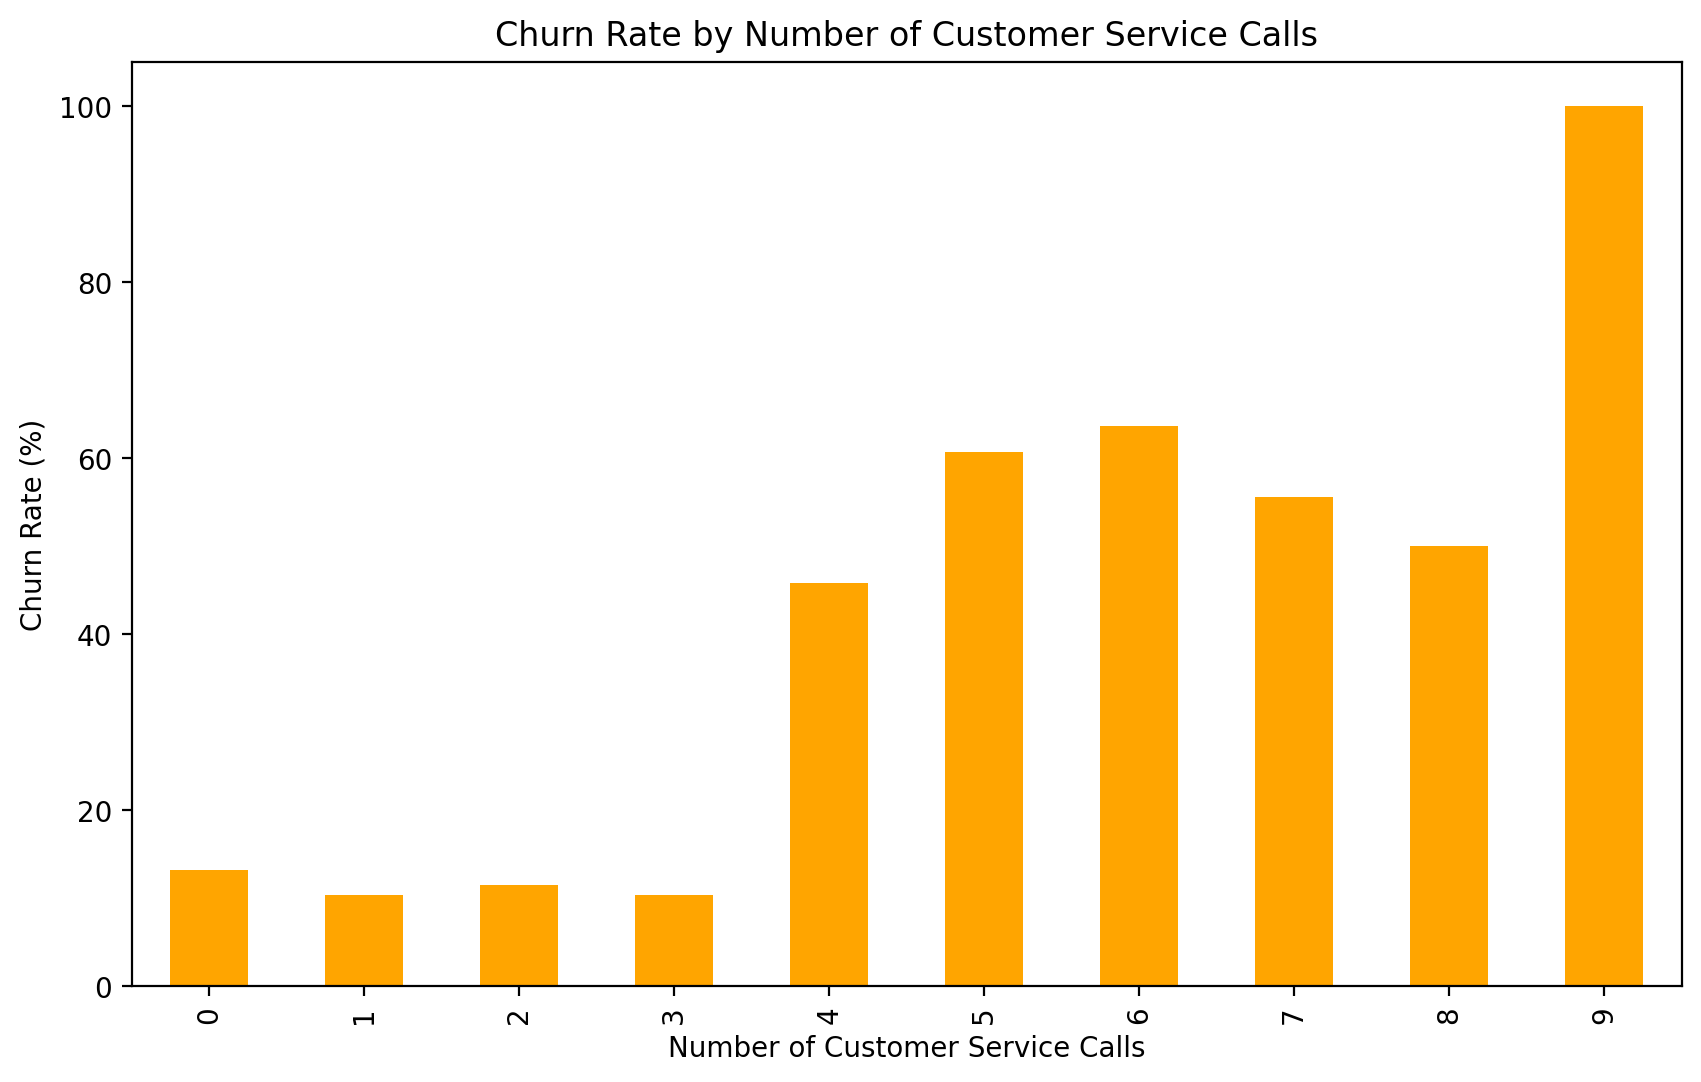

In [27]:
## Group data by number of customer service calls and calculate churn rate for each group
service_calls_churn = data.groupby('Customer service calls')['Churn'].mean() * 100

# Plot the churn rate against customer service calls
plt.figure(figsize=(10,6))
service_calls_churn.plot(kind='bar', color='orange')
plt.title('Churn Rate by Number of Customer Service Calls')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Churn Rate (%)')
plt.show()


The bar chart shows the churn rate for different numbers of customer service calls. It indicates that as the number of customer service calls increases, the churn rate also tends to rise significantly.

    Customers who made very few or no customer service calls have a relatively low churn rate.
    However, those who made multiple calls (especially more than 3) show a noticeably higher churn rate.

This suggests that frequent interaction with customer service may be associated with dissatisfaction, leading to an increased likelihood of churn.

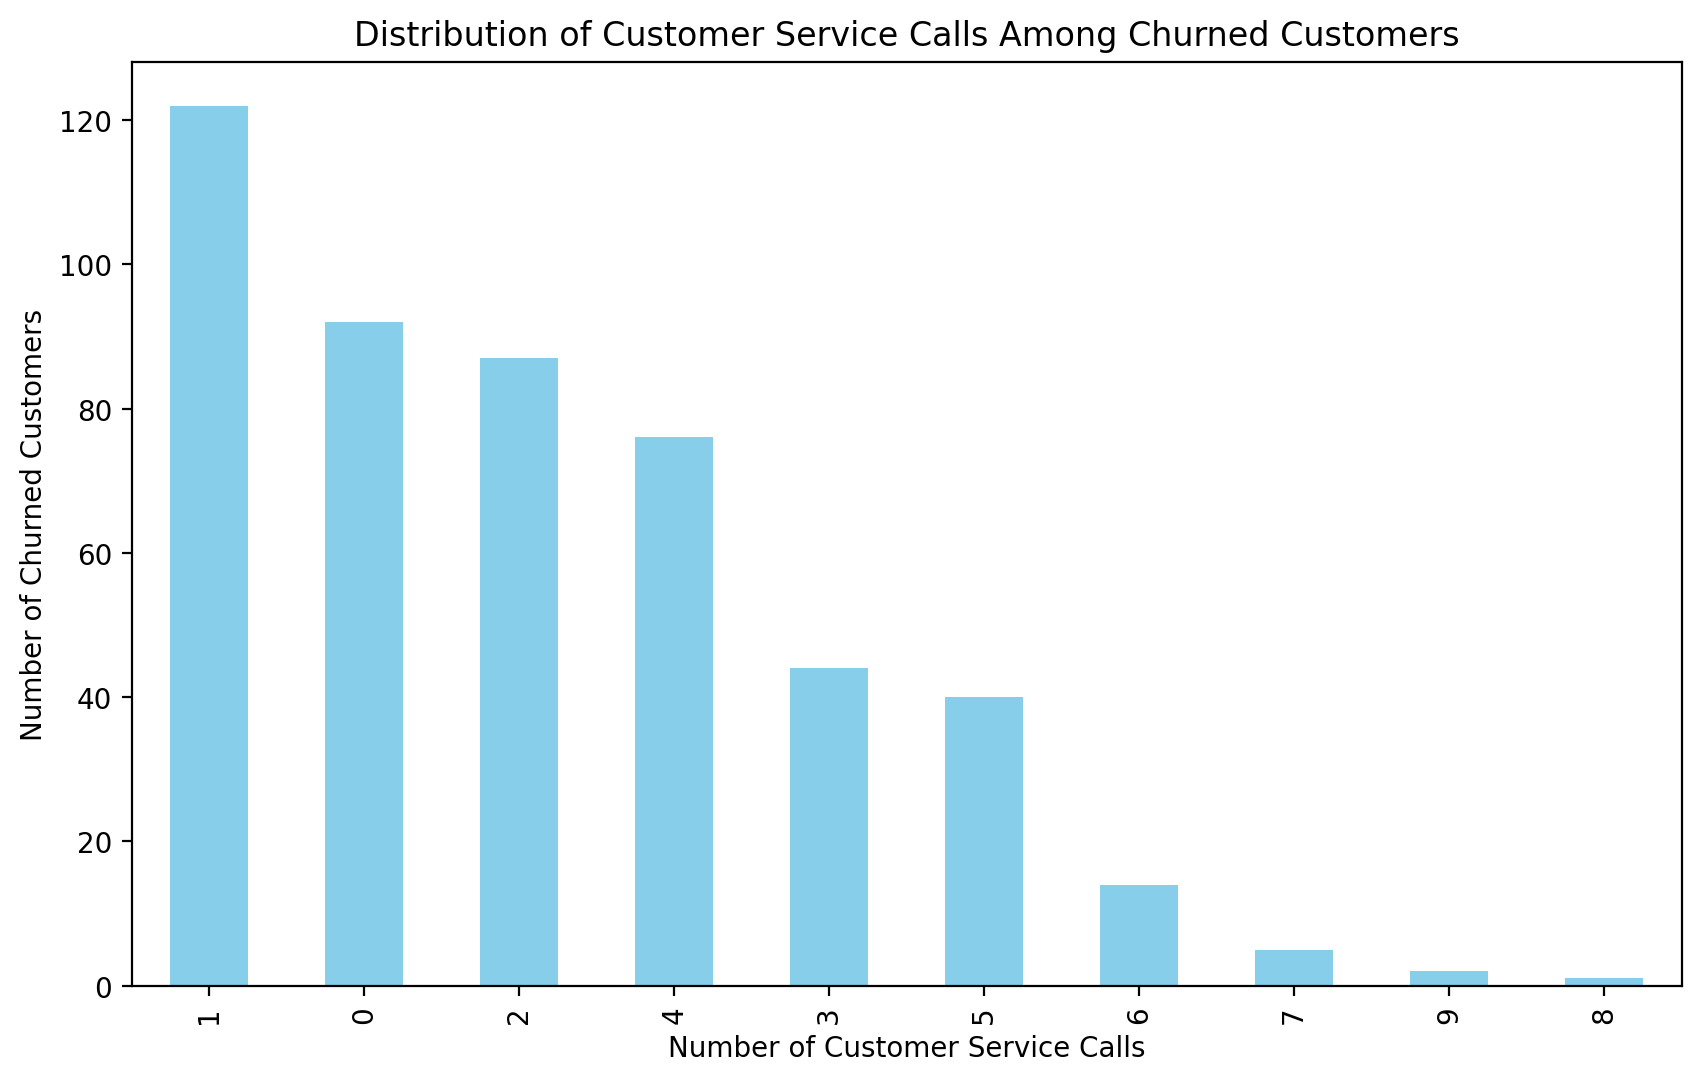

(1, 122)

In [28]:
# Filter the data to include only churned customers
churned_customers = data[data['Churn'] == True]

# Analyze the distribution of customer service calls among churned customers
churned_calls_distribution = churned_customers['Customer service calls'].value_counts()

# Plot the distribution
plt.figure(figsize=(10,6))
churned_calls_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customer Service Calls Among Churned Customers')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Number of Churned Customers')
plt.show()

# Return the most common number of customer service calls among churned customers
churned_calls_distribution.idxmax(), churned_calls_distribution.max()


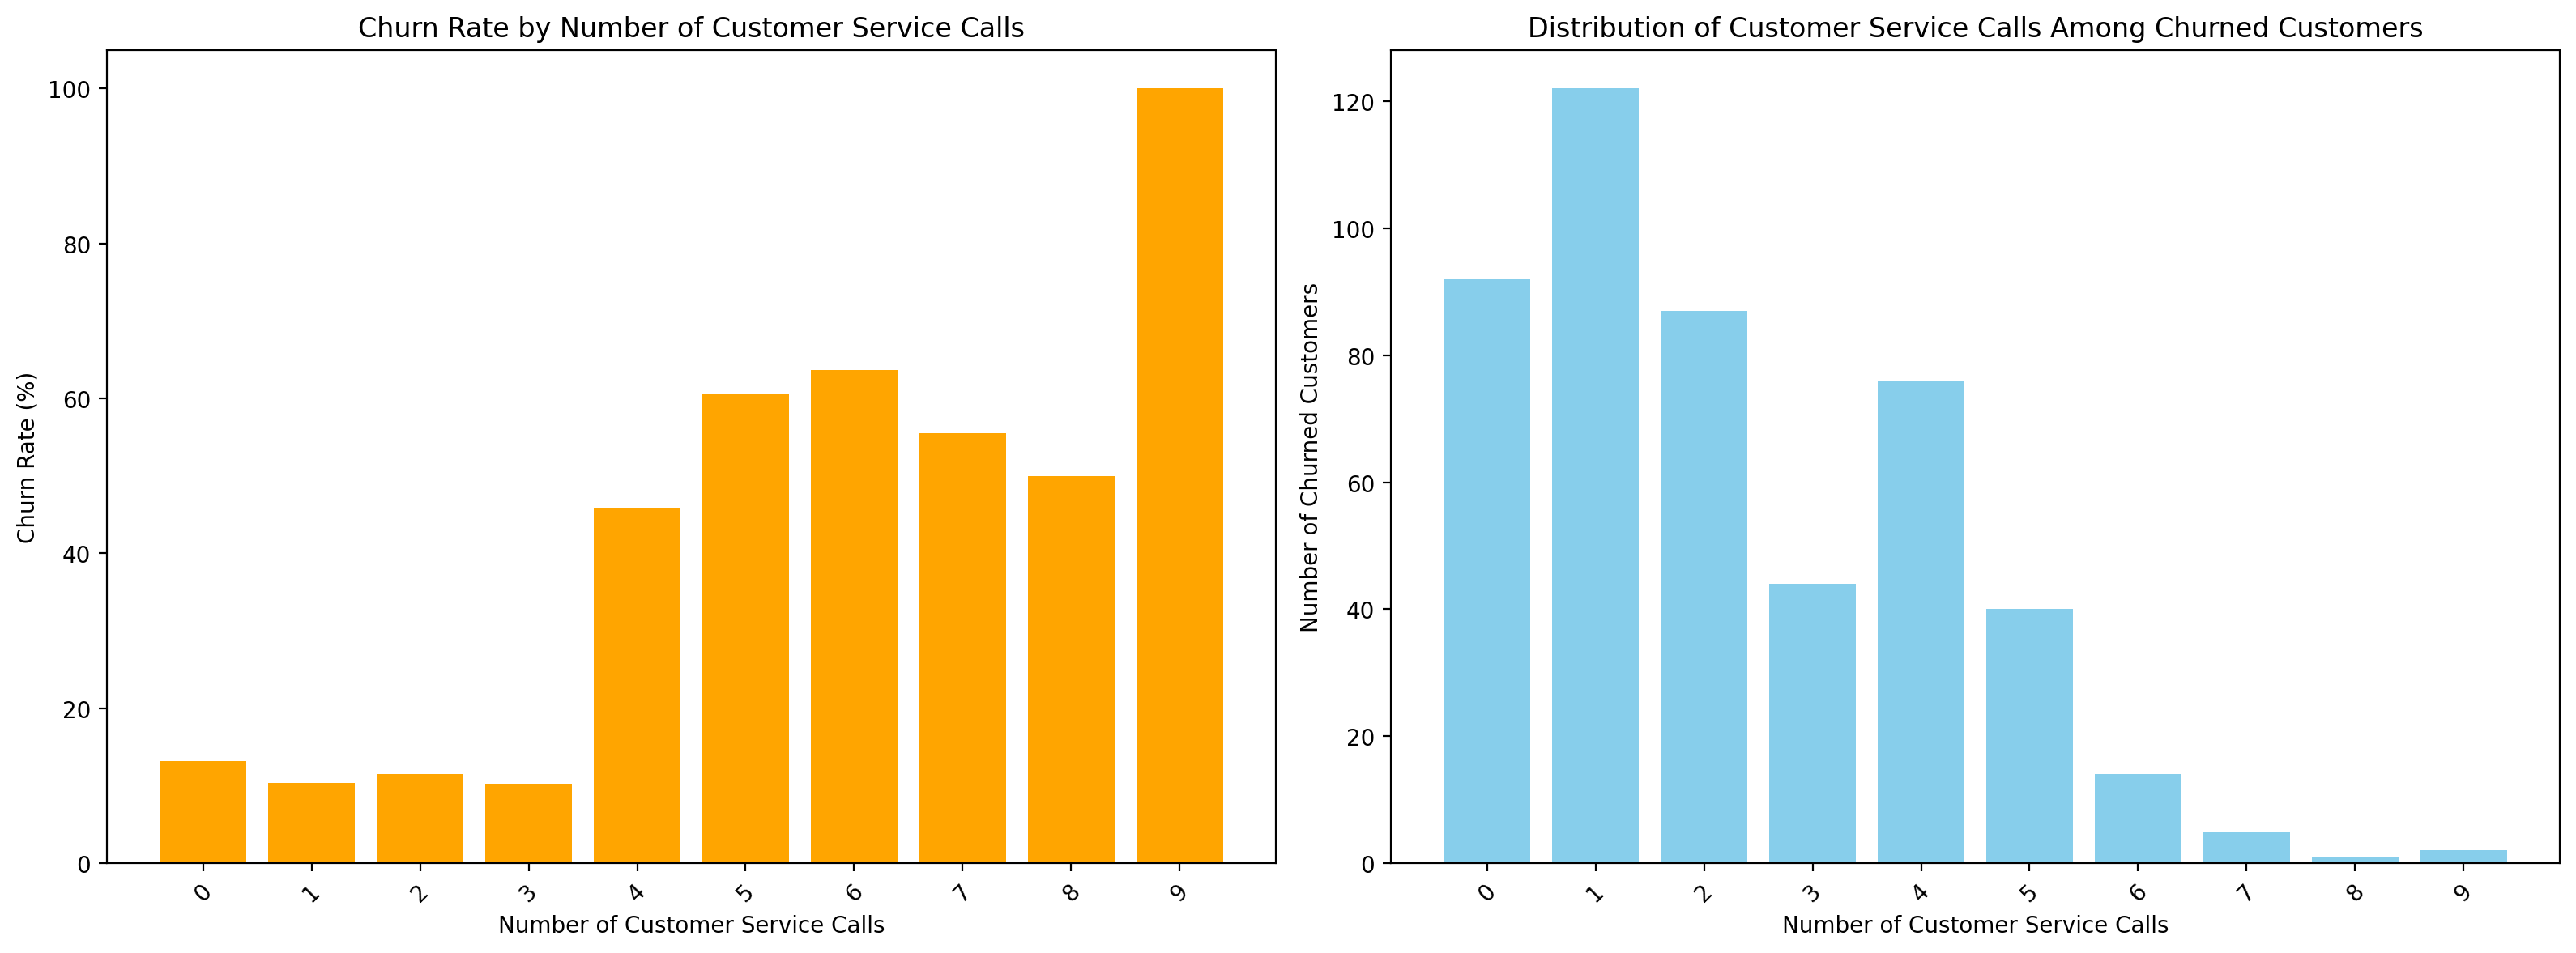

In [21]:
import matplotlib.pyplot as plt

# Group data by number of customer service calls and calculate churn rate for each group
service_calls_churn = data.groupby('Customer service calls')['Churn'].mean() * 100

# Filter the data to include only churned customers
churned_customers = data[data['Churn'] == True]

# Analyze the distribution of customer service calls among churned customers
churned_calls_distribution = churned_customers['Customer service calls'].value_counts()

# Create subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Churn rate by number of customer service calls
ax[0].bar(service_calls_churn.index, service_calls_churn, color='orange')
ax[0].set_title('Churn Rate by Number of Customer Service Calls')
ax[0].set_xlabel('Number of Customer Service Calls')
ax[0].set_ylabel('Churn Rate (%)')

# Set x-ticks for Plot 1 to ensure all values show
ax[0].set_xticks(service_calls_churn.index)
ax[0].set_xticklabels(service_calls_churn.index, rotation=45)

# Plot 2: Distribution of customer service calls among churned customers
ax[1].bar(churned_calls_distribution.index, churned_calls_distribution, color='skyblue')
ax[1].set_title('Distribution of Customer Service Calls Among Churned Customers')
ax[1].set_xlabel('Number of Customer Service Calls')
ax[1].set_ylabel('Number of Churned Customers')

# Set x-ticks for Plot 2 to ensure all values show
ax[1].set_xticks(churned_calls_distribution.index)
ax[1].set_xticklabels(churned_calls_distribution.index, rotation=45)

# Show the plots
plt.tight_layout()
plt.show()


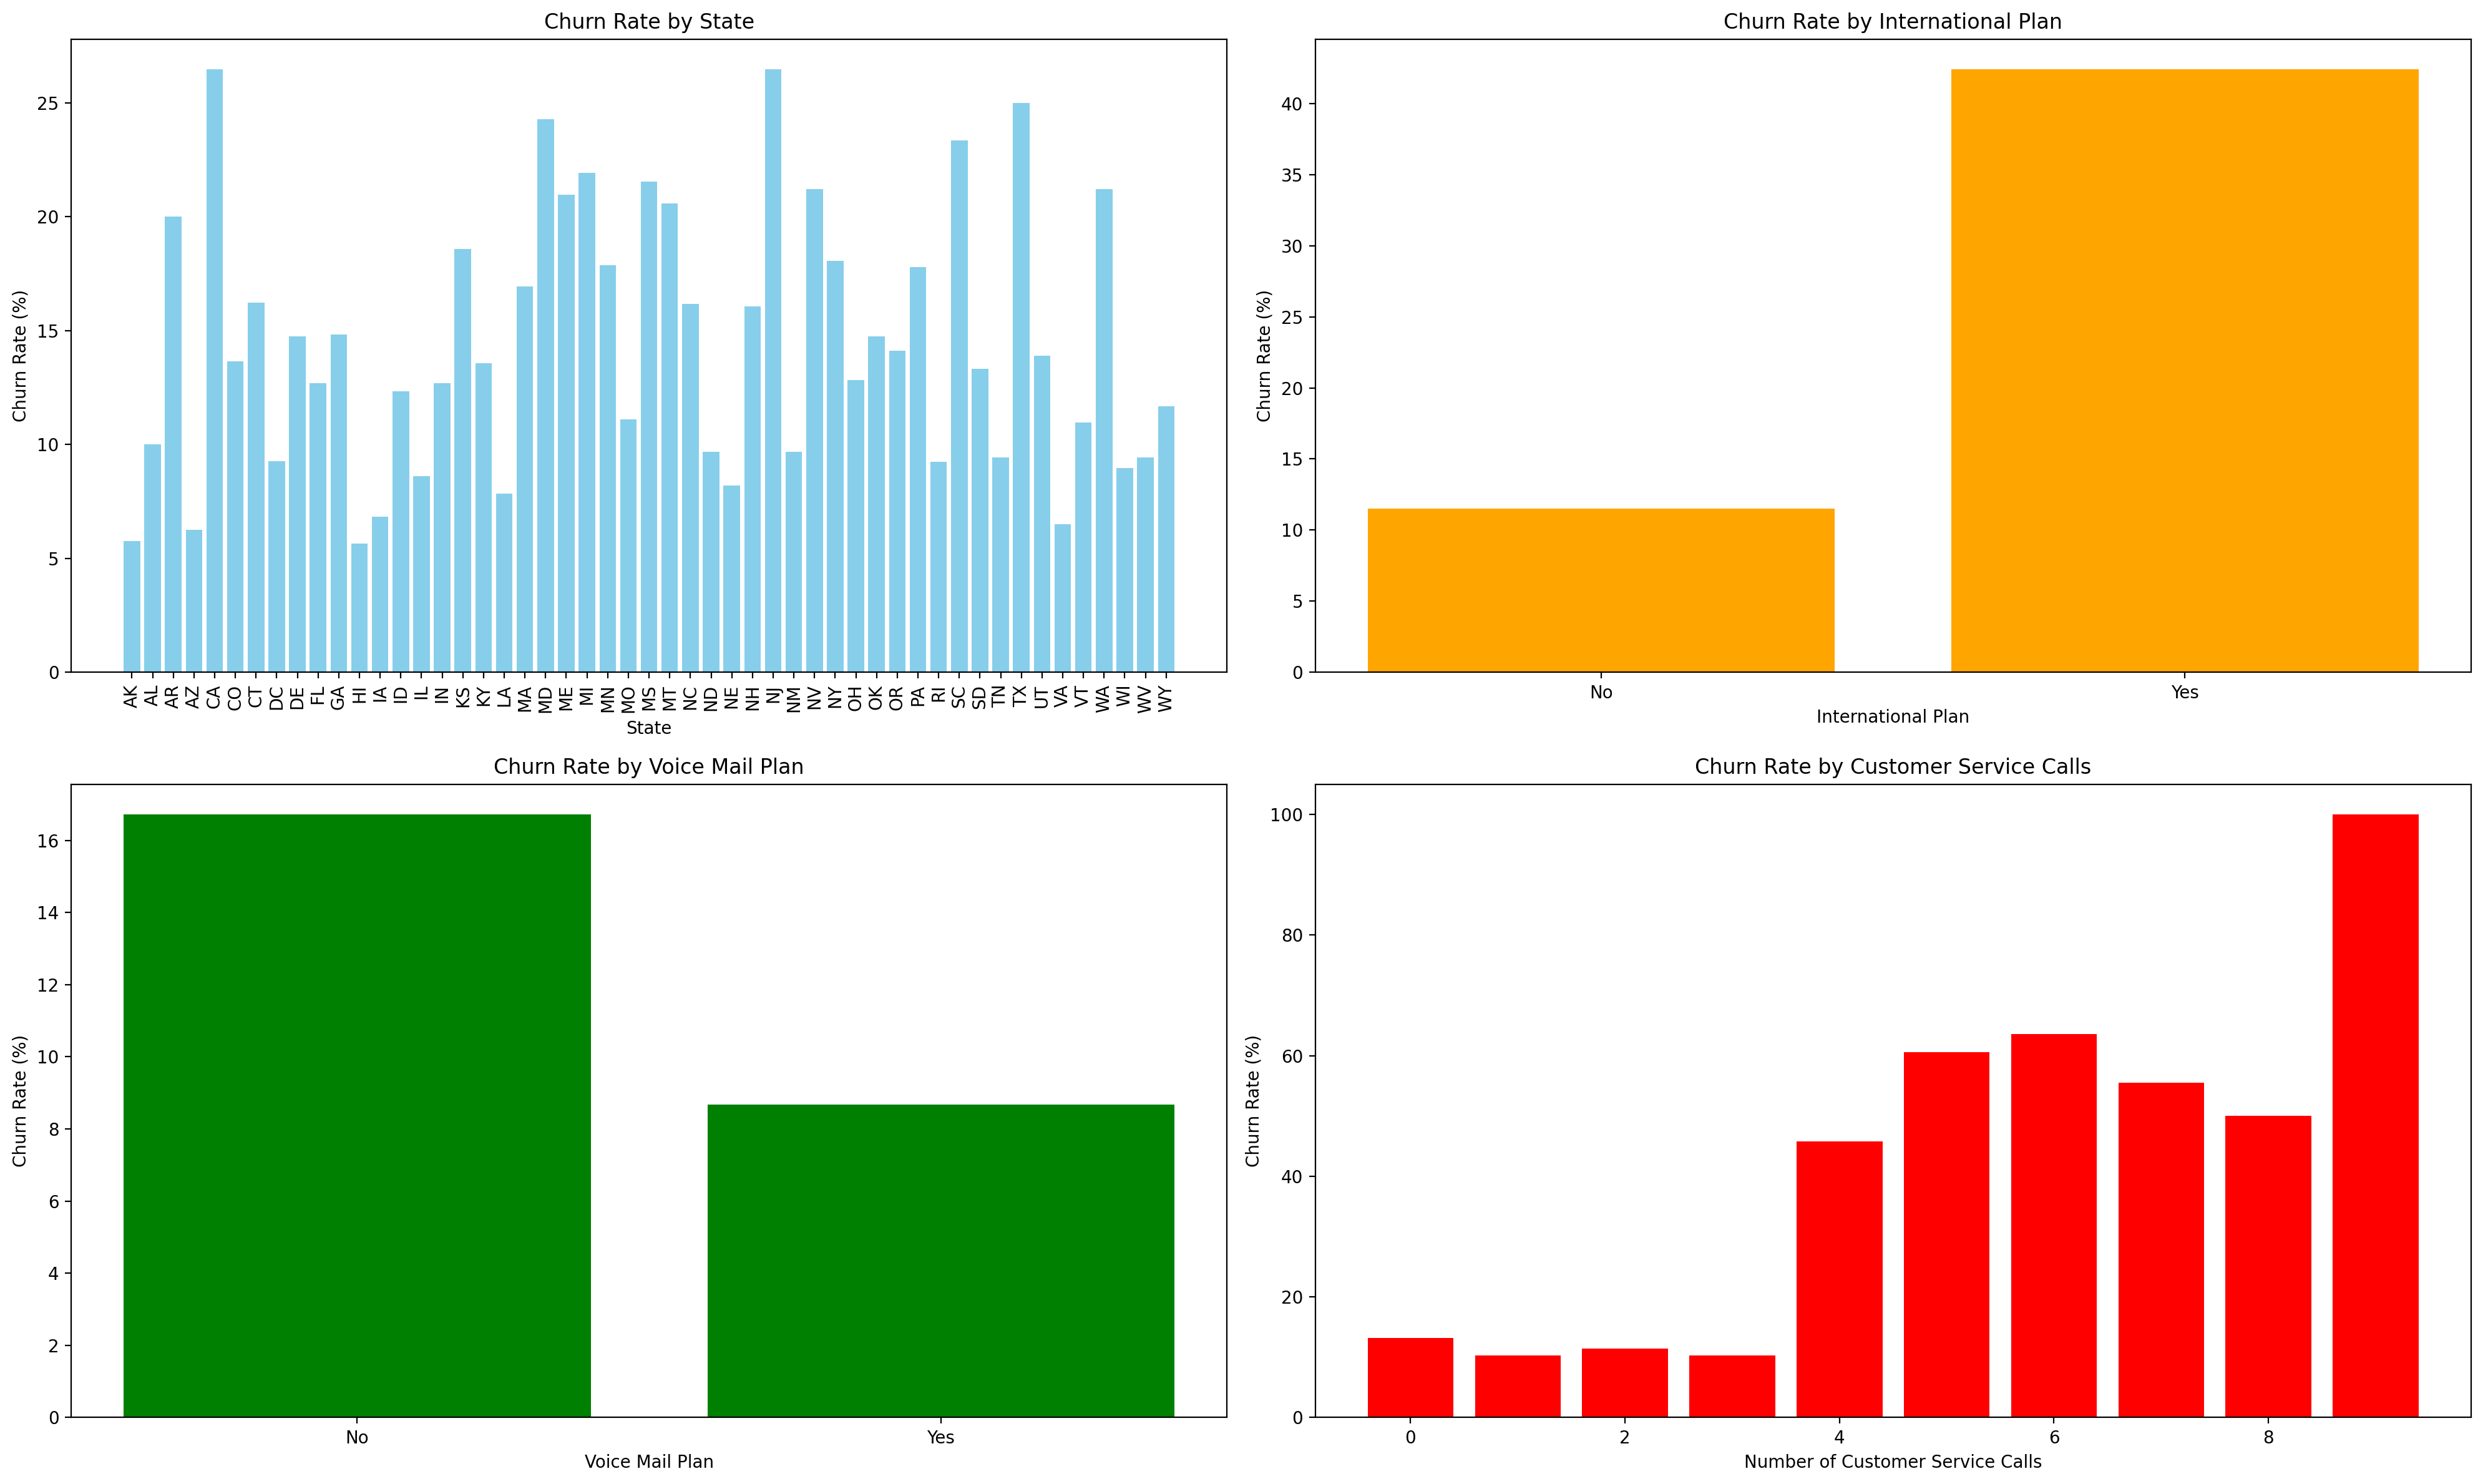

In [31]:
# Re-run the churn rate visualization across features

fig, axs = plt.subplots(2, 2, figsize=(20, 12))
# Calculate churn rate for each categorical feature and visualize

# Churn rate by State
state_churn_rate = data.groupby('State')['Churn'].mean() * 100

# Churn rate by International plan
intl_plan_churn_rate = data.groupby('International plan')['Churn'].mean() * 100

# Churn rate by Voice mail plan
vmail_plan_churn_rate = data.groupby('Voice mail plan')['Churn'].mean() * 100

# Churn rate by Customer service calls
service_calls_churn_rate = data.groupby('Customer service calls')['Churn'].mean() * 100

# Plotting churn rate across features

# # Plot churn rate by state
# axs[0, 0].bar(state_churn_rate.index, state_churn_rate, color='skyblue')
# axs[0, 0].set_title('Churn Rate by State')
# axs[0, 0].set_xlabel('State')
# axs[0, 0].set_ylabel('Churn Rate (%)')
# axs[0, 0].tick_params(axis='x', rotation=90)

# # Plot churn rate by international plan
# axs[0, 1].bar(intl_plan_churn_rate.index, intl_plan_churn_rate, color='orange')
# axs[0, 1].set_title('Churn Rate by International Plan')
# axs[0, 1].set_xlabel('International Plan')
# axs[0, 1].set_ylabel('Churn Rate (%)')

# # Plot churn rate by voice mail plan
# axs[1, 0].bar(vmail_plan_churn_rate.index, vmail_plan_churn_rate, color='green')
# axs[1, 0].set_title('Churn Rate by Voice Mail Plan')
# axs[1, 0].set_xlabel('Voice Mail Plan')
# axs[1, 0].set_ylabel('Churn Rate (%)')

# # Plot churn rate by customer service calls
# axs[1, 1].bar(service_calls_churn_rate.index, service_calls_churn_rate, color='red')
# axs[1, 1].set_title('Churn Rate by Customer Service Calls')
# axs[1, 1].set_xlabel('Number of Customer Service Calls')
# axs[1, 1].set_ylabel('Churn Rate (%)')

# plt.tight_layout()
# plt.show()

# Plot churn rate by state
axs[0, 0].bar(state_churn_rate.index, state_churn_rate, color='skyblue')
axs[0, 0].set_title('Churn Rate by State')
axs[0, 0].set_xlabel('State')
axs[0, 0].set_ylabel('Churn Rate (%)')
axs[0, 0].tick_params(axis='x', rotation=90)

# Plot churn rate by international plan
axs[0, 1].bar(intl_plan_churn_rate.index, intl_plan_churn_rate, color='orange')
axs[0, 1].set_title('Churn Rate by International Plan')
axs[0, 1].set_xlabel('International Plan')
axs[0, 1].set_ylabel('Churn Rate (%)')

# Plot churn rate by voice mail plan
axs[1, 0].bar(vmail_plan_churn_rate.index, vmail_plan_churn_rate, color='green')
axs[1, 0].set_title('Churn Rate by Voice Mail Plan')
axs[1, 0].set_xlabel('Voice Mail Plan')
axs[1, 0].set_ylabel('Churn Rate (%)')

# Plot churn rate by customer service calls
axs[1, 1].bar(service_calls_churn_rate.index, service_calls_churn_rate, color='red')
axs[1, 1].set_title('Churn Rate by Customer Service Calls')
axs[1, 1].set_xlabel('Number of Customer Service Calls')
axs[1, 1].set_ylabel('Churn Rate (%)')

plt.tight_layout()
plt.show()


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


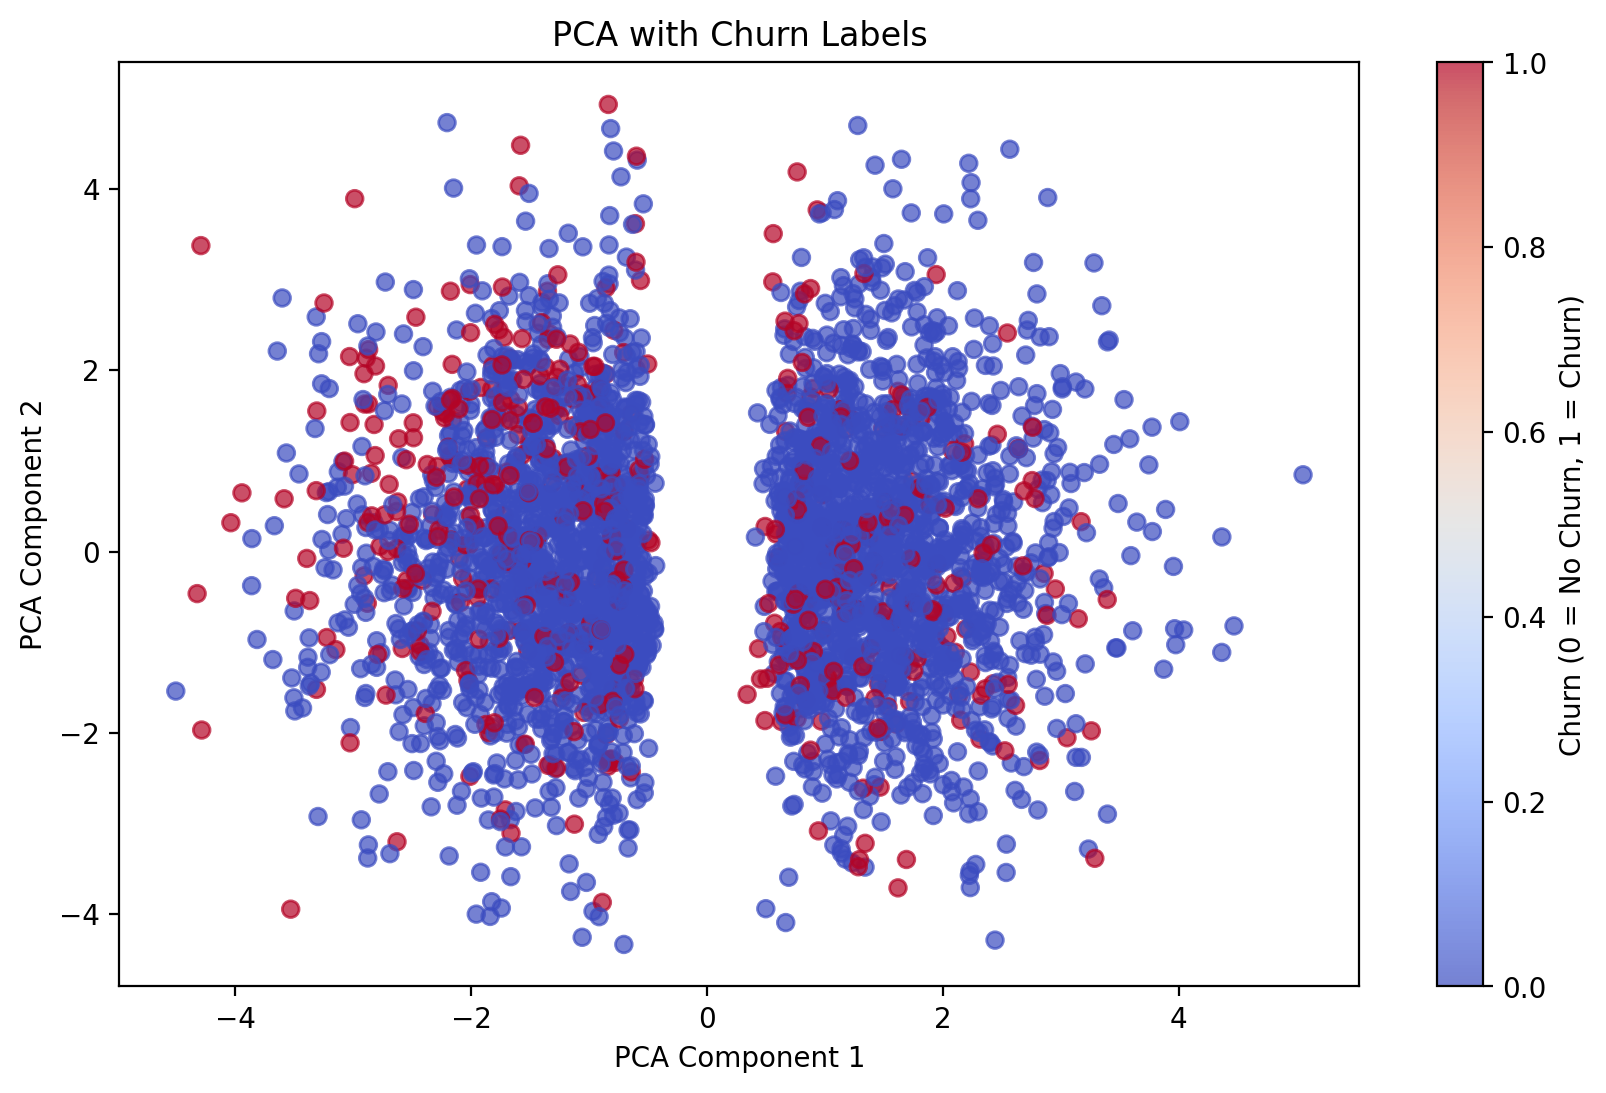

In [37]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Encode categorical features
data_encoded = data.copy()
label_encoders = {}

for col in ['State', 'International plan', 'Voice mail plan', 'Area code']:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Select all features (now encoded)
X_full = data_encoded.drop('Churn', axis=1)  # Drop churn because it's the target

# Scale the full feature set
scaler = StandardScaler()
X_scaled_full = scaler.fit_transform(X_full)

# Apply K-Means clustering
kmeans_full = KMeans(n_clusters=2, random_state=42)
clusters_full = kmeans_full.fit_predict(X_scaled_full)

# Add cluster labels to the original data
data_encoded['Cluster'] = clusters_full

# Visualize clusters using PCA (for 2D visualization)
pca_full = PCA(n_components=2)
X_pca_full = pca_full.fit_transform(X_scaled_full)

# plt.figure(figsize=(10,6))
# plt.scatter(X_pca_full[:, 0], X_pca_full[:, 1], c=clusters_full, cmap='viridis')
# plt.title('Customer Segmentation with K-Means (All Features)')
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.colorbar(label='Cluster')
# plt.show()
# Add churn labels to PCA visualization
plt.figure(figsize=(10,6))
plt.scatter(X_pca_full[:, 0], X_pca_full[:, 1], c=data_encoded['Churn'], cmap='coolwarm', alpha=0.7)
plt.title('PCA with Churn Labels')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Churn (0 = No Churn, 1 = Churn)')
plt.show()



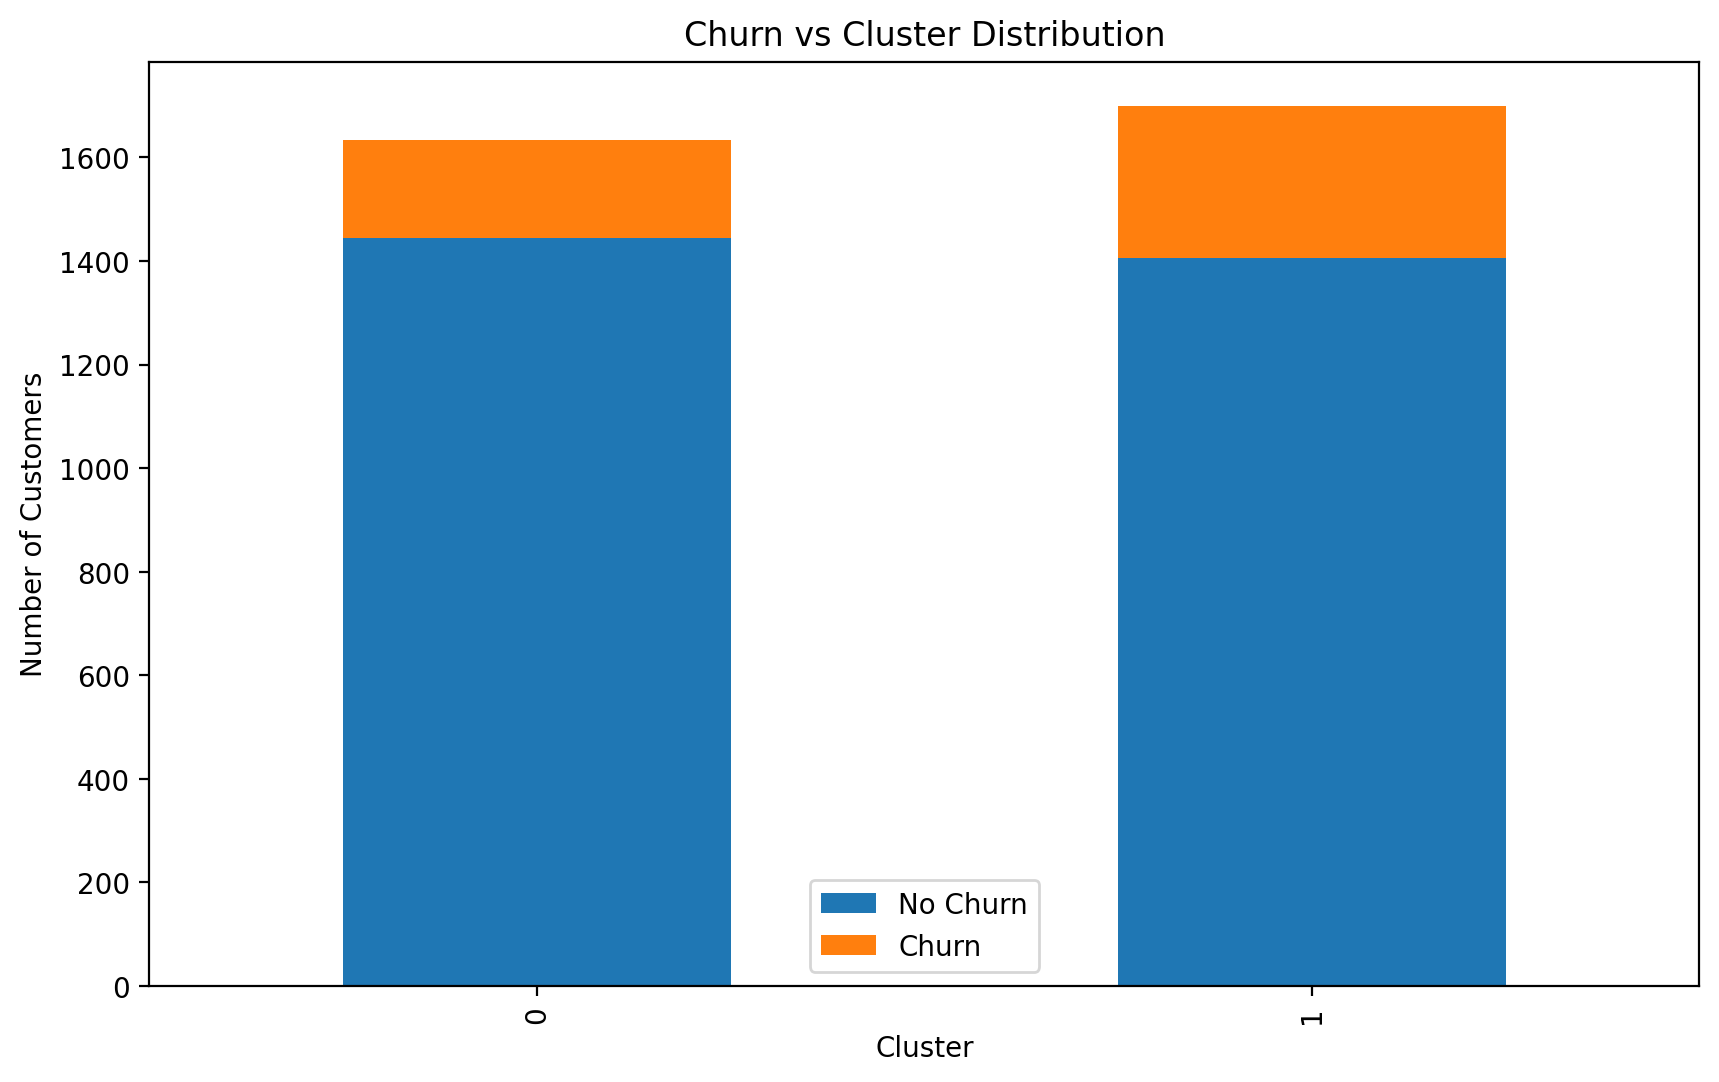

Churn    False  True 
Cluster              
0         1445    188
1         1405    295

In [39]:
# Cross-tabulation to compare churn with clusters
churn_cluster_comparison = pd.crosstab(data_encoded['Cluster'], data['Churn'])

# Plot the comparison
churn_cluster_comparison.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Churn vs Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.legend(['No Churn', 'Churn'])
plt.show()
# Count the number of churned and non-churned customers in each cluster
churn_count_per_cluster = pd.crosstab(data_encoded['Cluster'], data_encoded['Churn'])

# Display the results
churn_count_per_cluster


In [40]:
data_encoded_full = data_encoded

In [42]:
# Group the data by cluster and calculate the mean of each feature
cluster_characteristics = data_encoded_full.groupby('Cluster').mean()

# Display the characteristics of each cluster
cluster_characteristics

State  Account length  Area code  International plan  \
Cluster                                                             
0        26.374770      100.710961   0.994489            0.088794   
1        25.756471      101.404706   1.006471            0.104706   

         Voice mail plan  Number vmail messages  Total day minutes  \
Cluster                                                              
0               0.278016               8.164727         158.025536   
1               0.275294               8.035882         200.667471   

         Total day calls  Total day charge  Total eve minutes  \
Cluster                                                         
0             100.592162         26.864868         177.875015   
1             100.285294         34.114024         223.175059   

         Total eve calls  Total eve charge  Total night minutes  \
Cluster                                                           
0             100.363135         15.119584           229.292223   
1              99.875294         18.970094           173.571941   

         Total night calls  Total night charge  Total intl minutes  \
Cluster                                                              
0               100.115738           10.318340           10.253827   
1               100.100000            7.810718           10.221412   

         Total intl calls  Total intl charge  Customer service calls     Churn  
Cluster                                                                         
0                4.442131           2.769032                1.627679  0.115126  
1                4.515294           2.760306                1.500588  0.173529

In [43]:
# Group the data by Churn label and calculate the mean of each feature
churn_characteristics = data_encoded_full.groupby('Churn').mean()

# Display the characteristics of churned and non-churned customers
churn_characteristics

State  Account length  Area code  International plan  \
Churn                                                             
False  26.011930      100.793684   0.999649            0.065263   
True   26.339545      102.664596   1.006211            0.283644   

       Voice mail plan  Number vmail messages  Total day minutes  \
Churn                                                              
False         0.295439               8.604561         175.175754   
True          0.165631               5.115942         206.914079   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
Churn                                                                          
False       100.283158         29.780421         199.043298       100.038596   
True        101.335404         35.175921         212.410145       100.561077   

       Total eve charge  Total night minutes  Total night calls  \
Churn                                                             
False         16.918909           200.133193         100.058246   
True          18.054969           205.231677         100.399586   

       Total night charge  Total intl minutes  Total intl calls  \
Churn                                                             
False            9.006074           10.158877          4.532982   
True             9.235528           10.700000          4.163561   

       Total intl charge  Customer service calls   Cluster  
Churn                                                       
False           2.743404                1.449825  0.492982  
True            2.889545                2.229814  0.610766

Higher customer service calls: If churned customers have more customer service calls, it may indicate dissatisfaction or frustration.
Different service plans: If churned customers are more likely to have certain plans, this could signal issues with those plans (e.g., international plan dissatisfaction).
Usage differences: Differences in usage patterns (e.g., high international usage among churned customers) could highlight a need for better pricing or plan optimization.

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


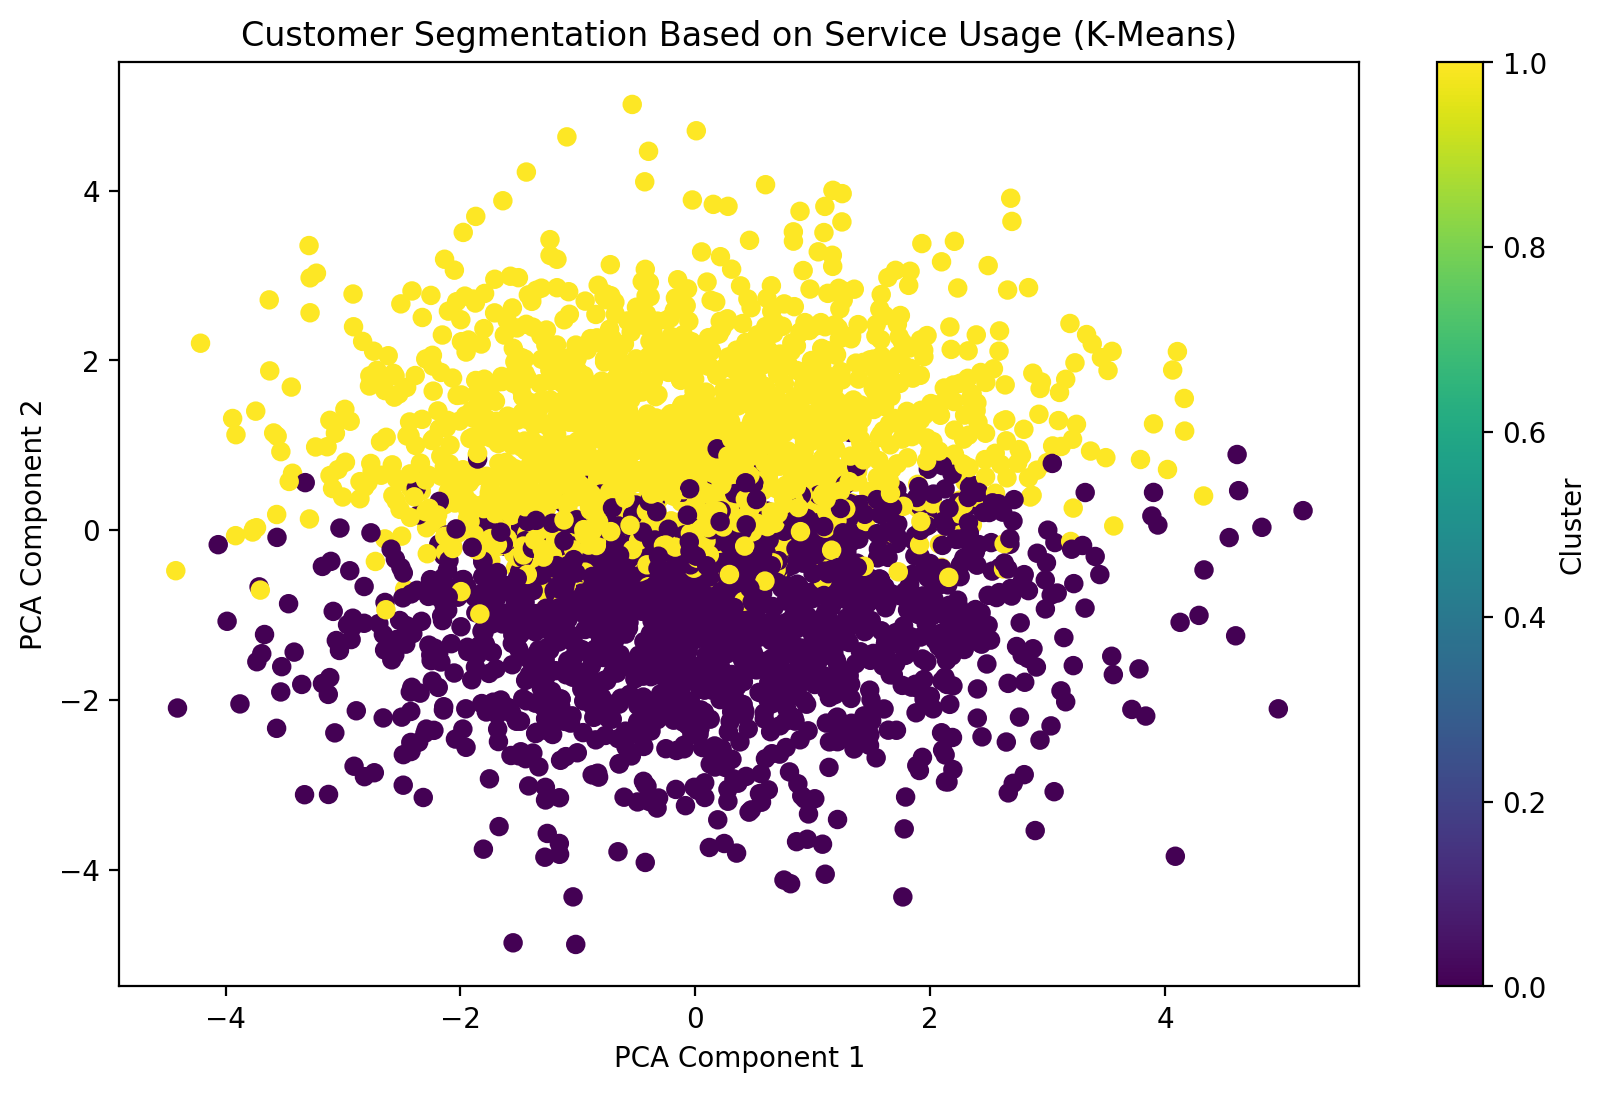

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select service usage features
usage_features = ['Total day minutes', 'Total eve minutes', 'Total night minutes', 
                  'Total intl minutes', 'Total day charge', 'Total eve charge', 
                  'Total night charge', 'Total intl charge']

# Scale the service usage features
scaler = StandardScaler()
X_scaled_usage = scaler.fit_transform(data[usage_features])

# Apply K-Means clustering
kmeans_usage = KMeans(n_clusters=2, random_state=42)
clusters_usage = kmeans_usage.fit_predict(X_scaled_usage)

# Add cluster labels to the original data
data['Usage_Cluster'] = clusters_usage

# Visualize clusters using PCA (for 2D visualization)
pca_usage = PCA(n_components=2)
X_pca_usage = pca_usage.fit_transform(X_scaled_usage)

plt.figure(figsize=(10,6))
plt.scatter(X_pca_usage[:, 0], X_pca_usage[:, 1], c=clusters_usage, cmap='viridis')
plt.title('Customer Segmentation Based on Service Usage (K-Means)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [50]:
from scipy.stats import chi2_contingency
import pandas as pd

# List of categorical features in the dataset
categorical_features = ['State', 'Area code', 'International plan', 'Voice mail plan']

# Run Chi-Square test for each categorical feature against churn
chi_square_results = {}

for feature in categorical_features:
    # Create a contingency table
    contingency_table = pd.crosstab(data[feature], data['Churn'])
    
    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Store the results
    chi_square_results[feature] = {'Chi-Square Statistic': chi2, 'P-value': p}

# Convert the results into a DataFrame for better visualization
chi_square_df = pd.DataFrame(chi_square_results).T
chi_square_df

Chi-Square Statistic       P-value
State                          83.043792  2.296222e-03
Area code                       0.177541  9.150557e-01
International plan            222.565757  2.493108e-50
Voice mail plan                34.131660  5.150640e-09

Summary of Key Findings:

    State and Voice Mail Plan show statistically significant relationships with churn, but their effect is moderate.
    International Plan has a very strong relationship with churn, indicating customers who subscribe to this plan are much more likely to churn.
    Area Code does not have any significant impact on churn.